# Importy

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display

# to play the audio files
from IPython.display import Audio


from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from collections.abc import Iterable

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization
from keras import layers, callbacks

# Wczytanie danych

In [3]:
Root_dir = 'data/kaggle/input/speech-emotion-recognition-en'

In [4]:
Crema_path = Root_dir + "/Crema/" 
Ravdess_path = Root_dir + "/Ravdess/audio_speech_actors_01-24/"
Savee_path = Root_dir + "/Savee/"
Tess_path = Root_dir + "/Tess/"

In [5]:
Crema_dir_list = os.listdir(Crema_path)
Ravdess_dir_list = os.listdir(Ravdess_path)
Savee_dir_list = os.listdir(Savee_path)
Tess_dir_list = os.listdir(Tess_path)

# Preprocessing danych

## Crema

In [6]:
Ex_Crema_dir_list = Crema_dir_list[:15]
Ex_Crema_dir_list

['1022_ITS_ANG_XX.wav',
 '1037_ITS_ANG_XX.wav',
 '1060_ITS_NEU_XX.wav',
 '1075_ITS_NEU_XX.wav',
 '1073_IOM_DIS_XX.wav',
 '1066_IOM_DIS_XX.wav',
 '1078_IWL_SAD_XX.wav',
 '1029_TAI_FEA_XX.wav',
 '1039_IEO_SAD_MD.wav',
 '1008_TAI_HAP_XX.wav',
 '1018_TSI_FEA_XX.wav',
 '1028_IEO_SAD_HI.wav',
 '1039_TSI_HAP_XX.wav',
 '1064_ITS_HAP_XX.wav',
 '1071_ITS_HAP_XX.wav']

In [8]:
emotions_crema = []
paths_crema = []

for it in Crema_dir_list:
    # storing file paths
    paths_crema.append(Crema_path + it)
    # storing file emotions
    part = it.split('_')
    if part[2] == 'SAD':
        emotions_crema.append('sad')
    elif part[2] == 'ANG':
        emotions_crema.append('angry')
    elif part[2] == 'DIS':
        emotions_crema.append('disgust')
    elif part[2] == 'FEA':
        emotions_crema.append('fear')
    elif part[2] == 'HAP':
        emotions_crema.append('happy')
    elif part[2] == 'NEU':
        emotions_crema.append('neutral')
    else:
        emotions_crema.append('Unknown')
        
# dataframe for emotion of files
emotions_crema_df = pd.DataFrame(emotions_crema, columns=['Emotions'])

# dataframe for path of files.
path_crema_df = pd.DataFrame(paths_crema, columns=['Path'])
Crema_df = pd.concat([emotions_crema_df, path_crema_df], axis=1)
print(Crema_df.shape)
Crema_df.head()

(7442, 2)


Emotions                                               Path
0    angry  data/kaggle/input/speech-emotion-recognition-e...
1    angry  data/kaggle/input/speech-emotion-recognition-e...
2  neutral  data/kaggle/input/speech-emotion-recognition-e...
3  neutral  data/kaggle/input/speech-emotion-recognition-e...
4  disgust  data/kaggle/input/speech-emotion-recognition-e...

In [9]:
[Crema_df["Emotions"].unique().tolist() for i in Crema_df.columns]

[['angry', 'neutral', 'disgust', 'sad', 'fear', 'happy'],
 ['angry', 'neutral', 'disgust', 'sad', 'fear', 'happy']]

# Data mining

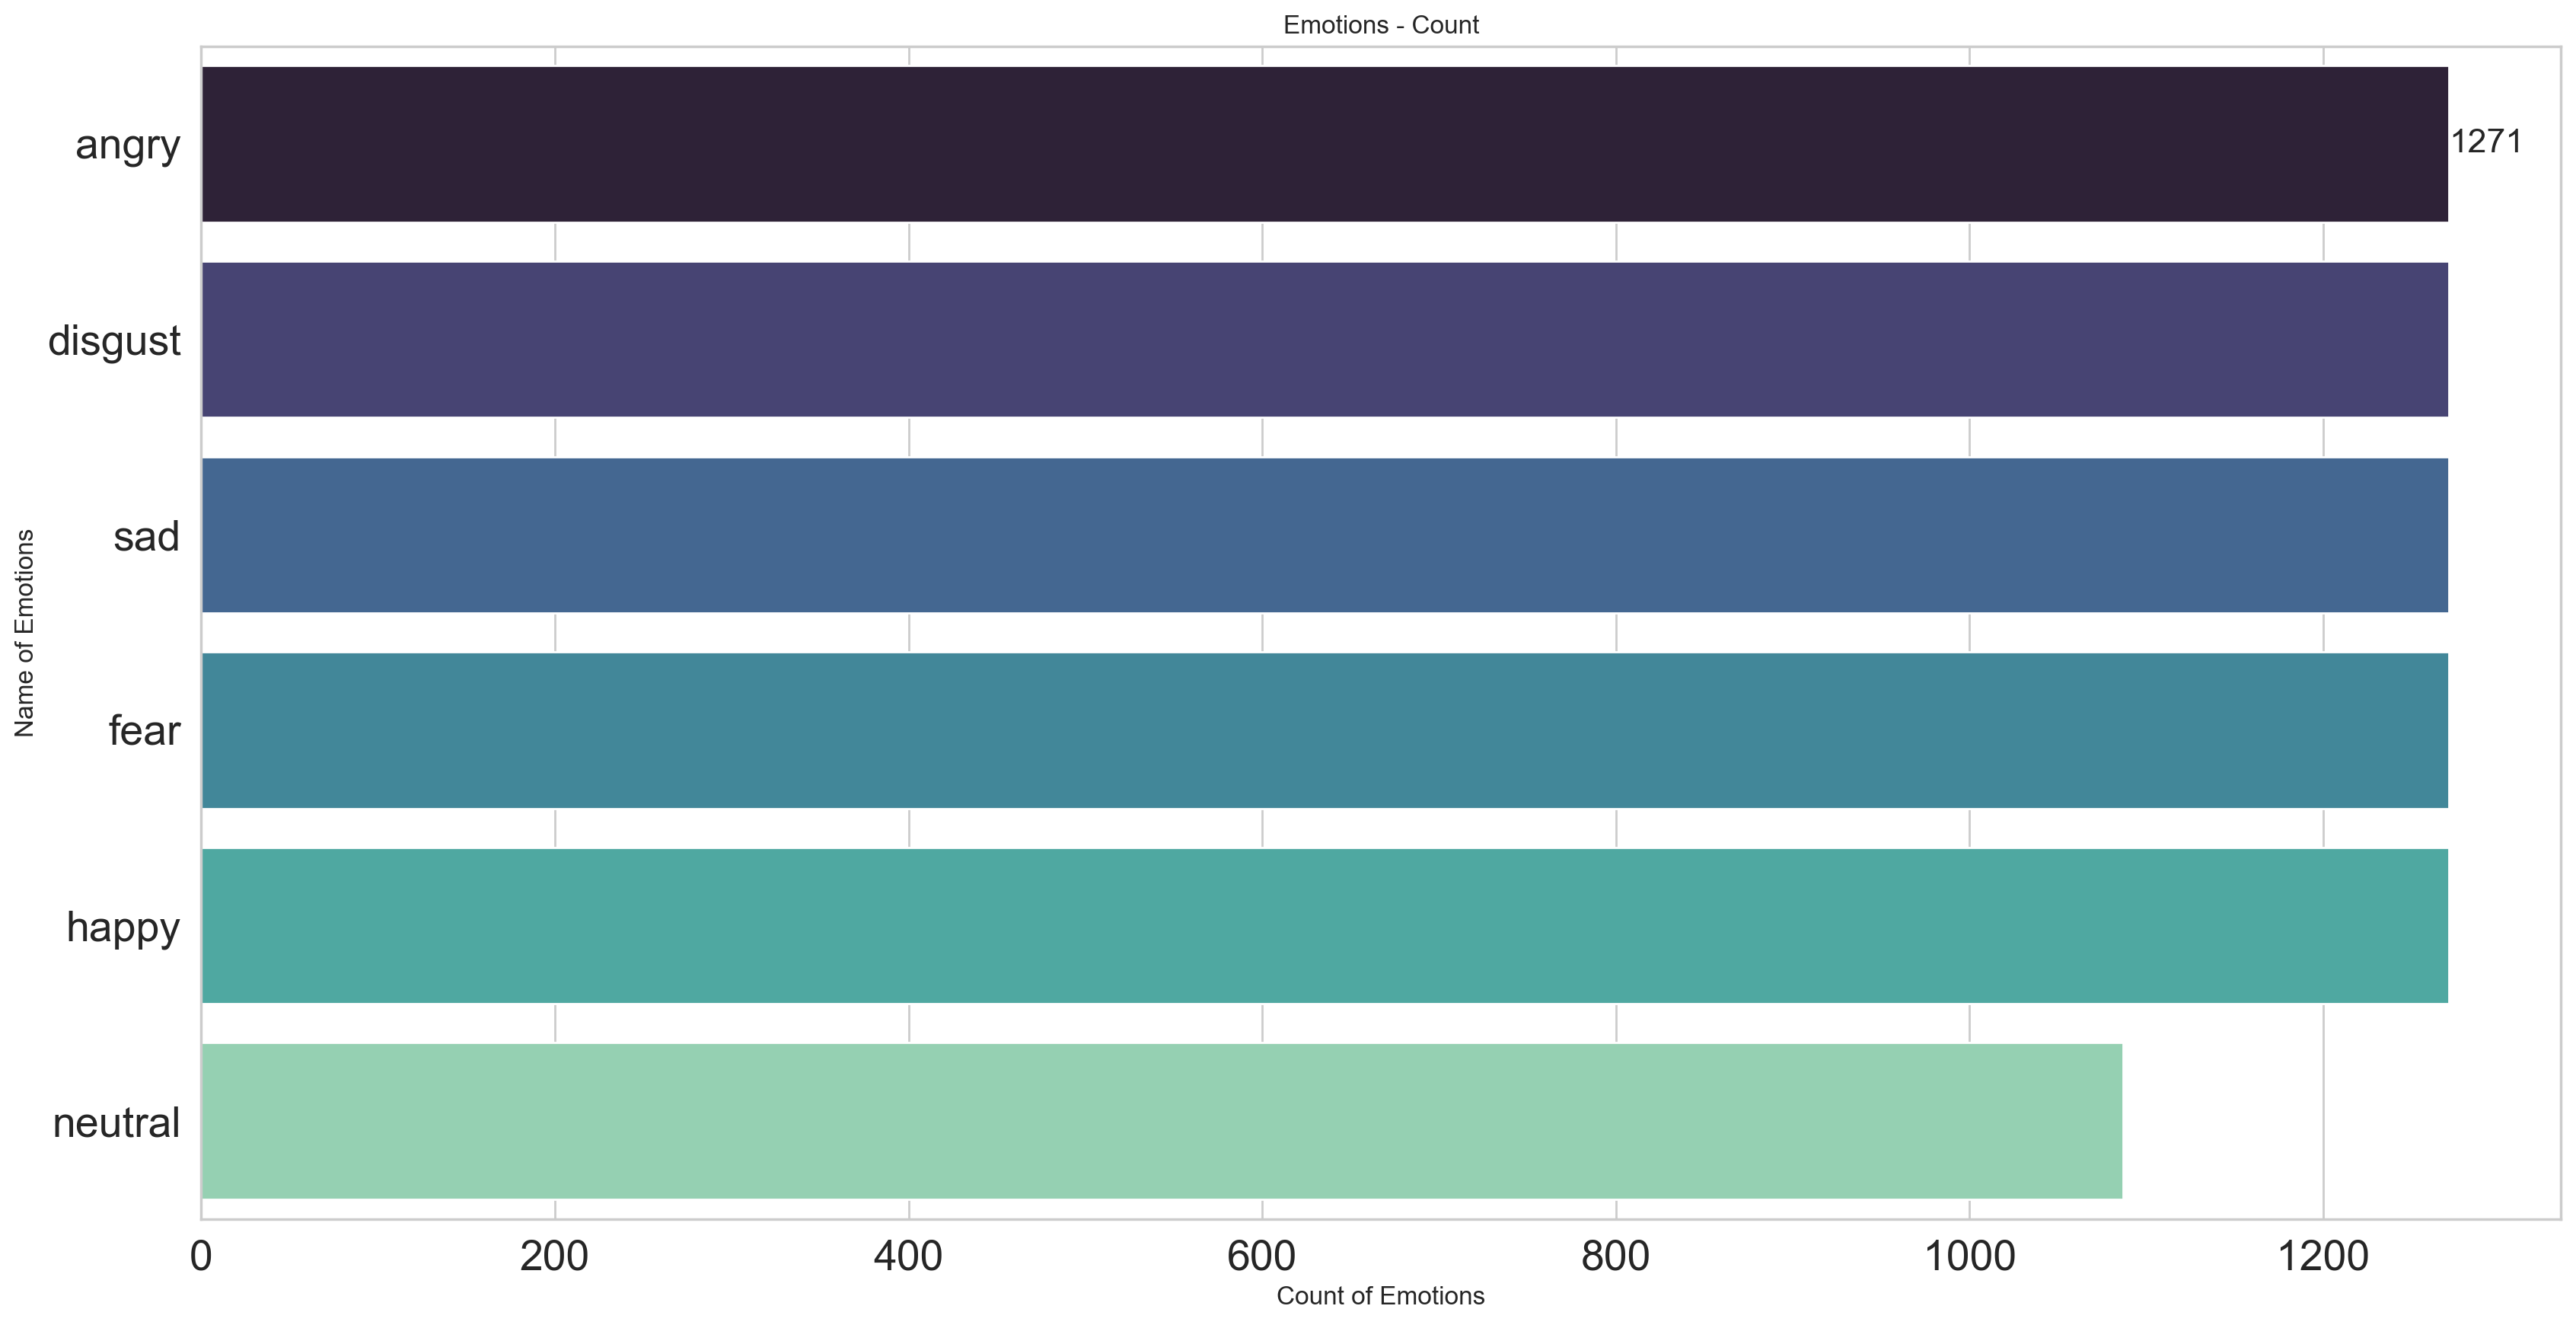

In [11]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Crema_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions")
plt.xlabel("Count of Emotions")
plt.title("Emotions - Count")
plt.show()

# Ravdess

In [12]:
Ex_Ravdess_dir_list = Ravdess_dir_list[:15]
Ex_Ravdess_dir_list

['Actor_16',
 'Actor_11',
 'Actor_18',
 'Actor_20',
 'Actor_21',
 'Actor_19',
 'Actor_10',
 'Actor_17',
 '.DS_Store',
 'Actor_04',
 'Actor_03',
 'Actor_02',
 'Actor_05',
 'Actor_12',
 'Actor_15']

In [15]:
emotions_ravdess = []
path_ravdess = []

for it in Ravdess_dir_list:
    # There are 20 actors
    if os.path.isdir(Ravdess_path + it):
        actor = os.listdir(Ravdess_path + it)
        for file in actor:
            part = file.split('.')[0]
            part = part.split('-')
            # third part in each file represents the emotion associated to that file.
            emotions_ravdess.append(int(part[2]))
            path_ravdess.append(Ravdess_path + it + '/' + file)
        
    
emotion_ravdess_df = pd.DataFrame(emotions_ravdess, columns=['Emotions'])

path_ravdess_df = pd.DataFrame(path_ravdess, columns=['Path'])
Ravdess_df = pd.concat([emotion_ravdess_df, path_ravdess_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm',
                             3:'happy', 4:'sad', 5:'angry',
                             6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0    angry  data/kaggle/input/speech-emotion-recognition-e...
1     fear  data/kaggle/input/speech-emotion-recognition-e...
2     fear  data/kaggle/input/speech-emotion-recognition-e...
3    angry  data/kaggle/input/speech-emotion-recognition-e...
4  disgust  data/kaggle/input/speech-emotion-recognition-e...

In [16]:
[Ravdess_df["Emotions"].unique().tolist() for i in Ravdess_df.columns]

[['angry', 'fear', 'disgust', 'sad', 'surprise', 'happy', 'calm', 'neutral'],
 ['angry', 'fear', 'disgust', 'sad', 'surprise', 'happy', 'calm', 'neutral']]

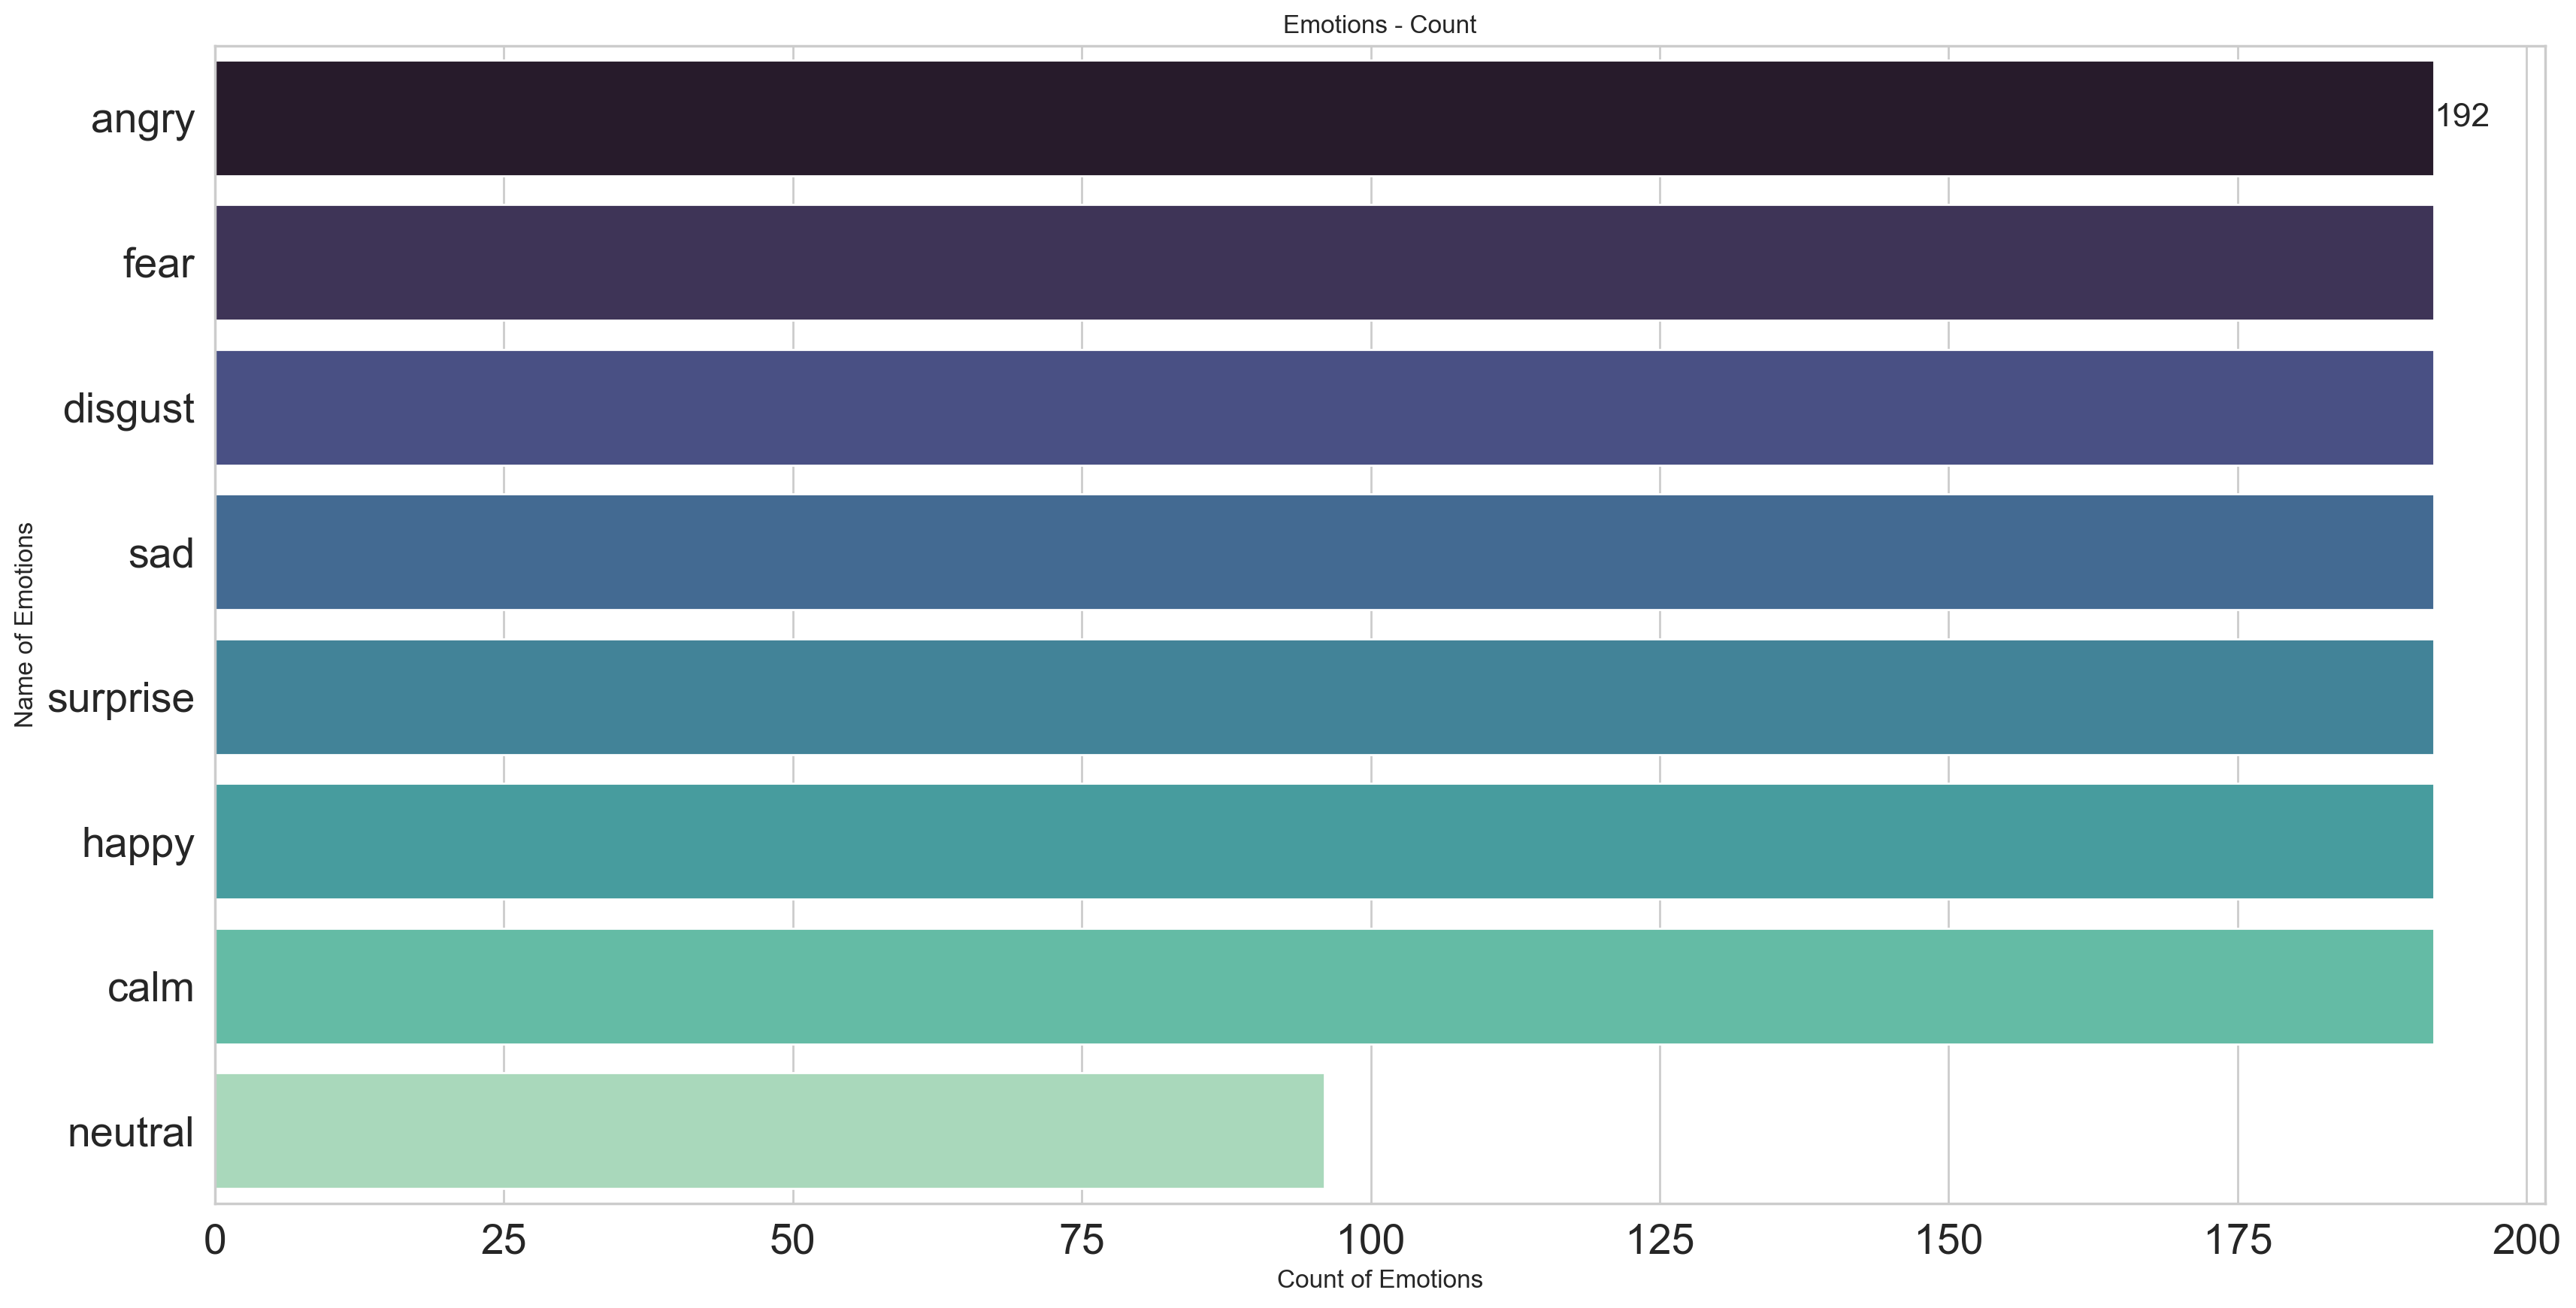

In [17]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Ravdess_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions")
plt.xlabel("Count of Emotions")
plt.title("Emotions - Count")
plt.show()

# Savee

In [18]:
Ex_Savee_dir_list = Savee_dir_list[:15]
Ex_Savee_dir_list

['JK_sa01.wav',
 'JK_sa15.wav',
 'DC_n13.wav',
 'DC_su09.wav',
 'DC_n07.wav',
 'JK_n20.wav',
 'JK_n08.wav',
 'JE_sa08.wav',
 'JK_f15.wav',
 'JK_f01.wav',
 'KL_sa13.wav',
 'KL_sa07.wav',
 'JK_d03.wav',
 'DC_h01.wav',
 'DC_h15.wav']

In [20]:
emotions_savee = []
path_savee = []

for it in Savee_dir_list:
    path_savee.append(Savee_path + it)
    part = it.split('_')[1]
    part = part[:-6]
    if part == 'a':
        emotions_savee.append('angry')
    elif part == 'd':
        emotions_savee.append('disgust')
    elif part == 'f':
        emotions_savee.append('fear')
    elif part == 'h':
        emotions_savee.append('happiness')
    elif part == 'n':
        emotions_savee.append('neutral')
    elif part == 'sa':
        emotions_savee.append('sadness')
    elif part == 'su':
        emotions_savee.append('surprise')
        
    else:
        emotions_savee.append('Unknown')
        
# dataframe for emotion of files
emotion_savee_df = pd.DataFrame(emotions_savee, columns=['Emotions'])

# dataframe for path of files.
path_savee_df = pd.DataFrame(path_savee, columns=['Path'])
Savee_df = pd.concat([emotion_savee_df, path_savee_df], axis=1)
Savee_df.head()

Emotions                                               Path
0   sadness  data/kaggle/input/speech-emotion-recognition-e...
1   sadness  data/kaggle/input/speech-emotion-recognition-e...
2   neutral  data/kaggle/input/speech-emotion-recognition-e...
3  surprise  data/kaggle/input/speech-emotion-recognition-e...
4   neutral  data/kaggle/input/speech-emotion-recognition-e...

In [21]:
[Savee_df["Emotions"].unique().tolist() for i in Savee_df.columns]

[['sadness', 'neutral', 'surprise', 'fear', 'disgust', 'happiness', 'angry'],
 ['sadness', 'neutral', 'surprise', 'fear', 'disgust', 'happiness', 'angry']]

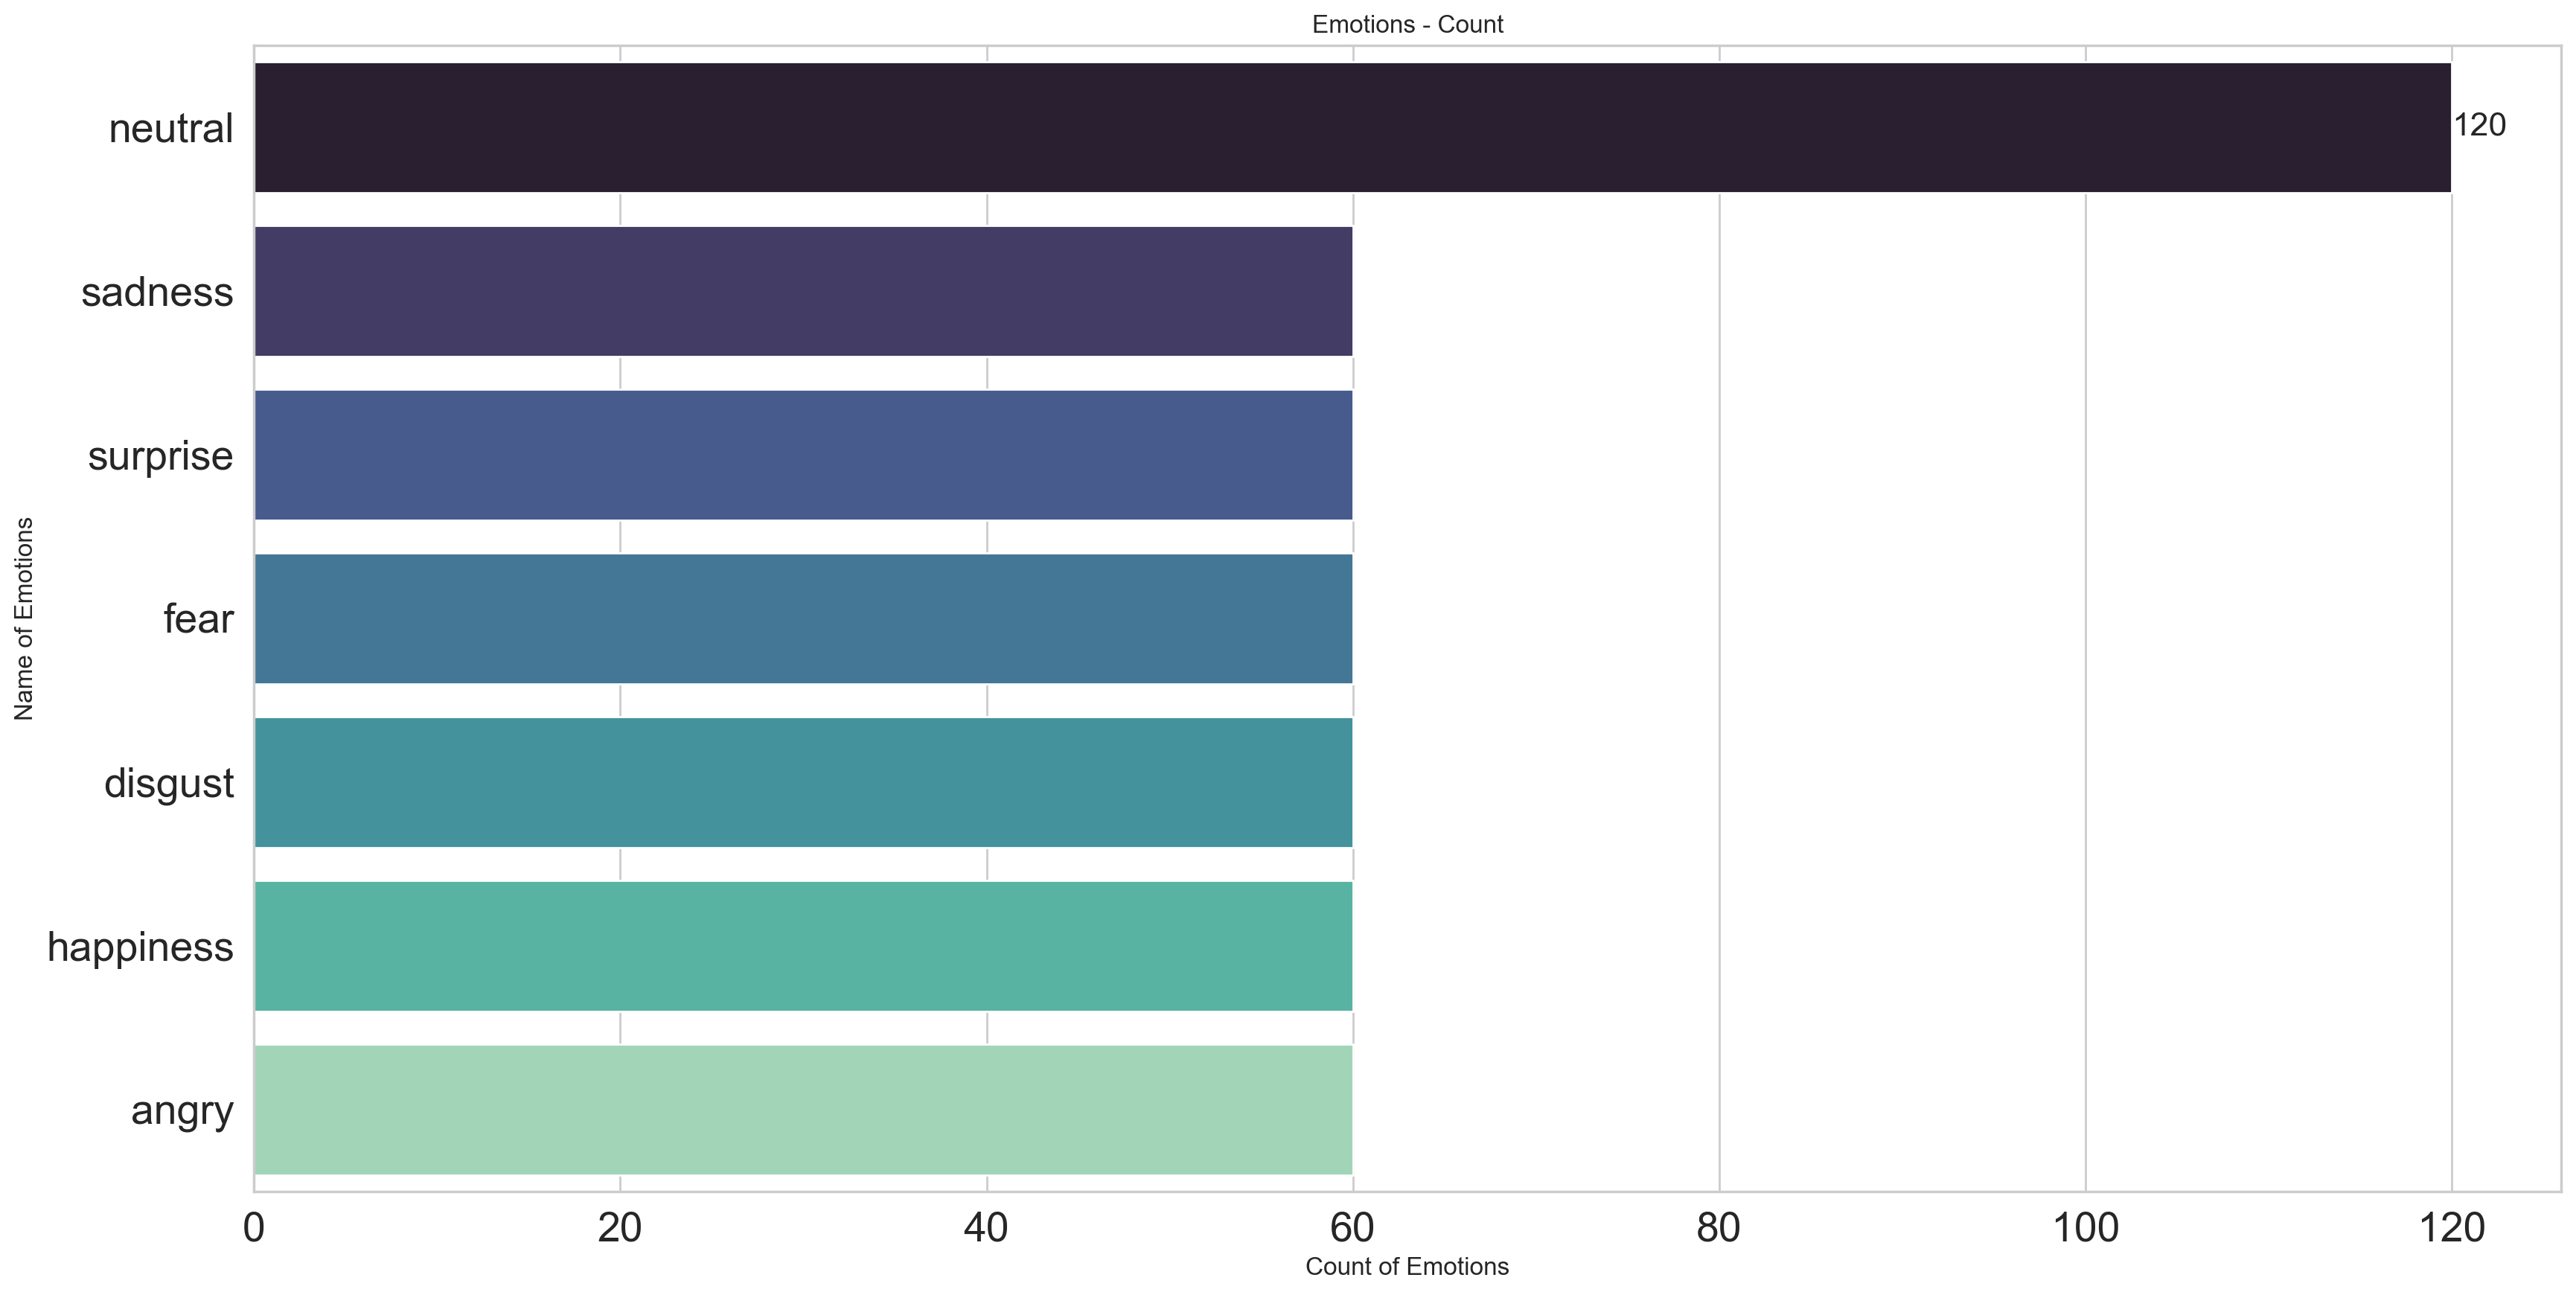

In [22]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Savee_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions")
plt.xlabel("Count of Emotions")
plt.title("Emotions - Count")
plt.show()

In [23]:
Ex_Tess_dir_list = Tess_dir_list[:15]
Ex_Tess_dir_list

['YAF_disgust',
 'OAF_Pleasant_surprise',
 '.DS_Store',
 'OAF_happy',
 'YAF_sad',
 'YAF_happy',
 'YAF_neutral',
 'OAF_Fear',
 'OAF_angry',
 'YAF_pleasant_surprised',
 'YAF_fear',
 'OAF_neutral',
 'OAF_disgust',
 'YAF_angry',
 'OAF_Sad']

# Tess

In [25]:
emotions_tess = []
path_tess = []

for it in Tess_dir_list:
    path = f"{Tess_path}/{it}"
    if os.path.isdir(path):
        directories = os.listdir(path)
        for file in directories:
            part = file.split('.')[0]
            part = part.split('_')[2]
            if part=='ps':
                emotions_tess.append('surprise')
            else:
                emotions_tess.append(part)
            path_tess.append(f"{Tess_path}/{it}/{file}")
            
        
        
# dataframe for emotion of files
emotion_tess_df = pd.DataFrame(emotions_tess, columns=['Emotions'])

# dataframe for path of files.
path_tess_df = pd.DataFrame(path_tess, columns=['Path'])
Tess_df = pd.concat([emotion_tess_df, path_tess_df], axis=1)
Tess_df.head()

Emotions                                               Path
0  disgust  data/kaggle/input/speech-emotion-recognition-e...
1  disgust  data/kaggle/input/speech-emotion-recognition-e...
2  disgust  data/kaggle/input/speech-emotion-recognition-e...
3  disgust  data/kaggle/input/speech-emotion-recognition-e...
4  disgust  data/kaggle/input/speech-emotion-recognition-e...

In [26]:
[Tess_df["Emotions"].unique().tolist() for i in Tess_df.columns]

[['disgust', 'surprise', 'happy', 'sad', 'neutral', 'fear', 'angry'],
 ['disgust', 'surprise', 'happy', 'sad', 'neutral', 'fear', 'angry']]

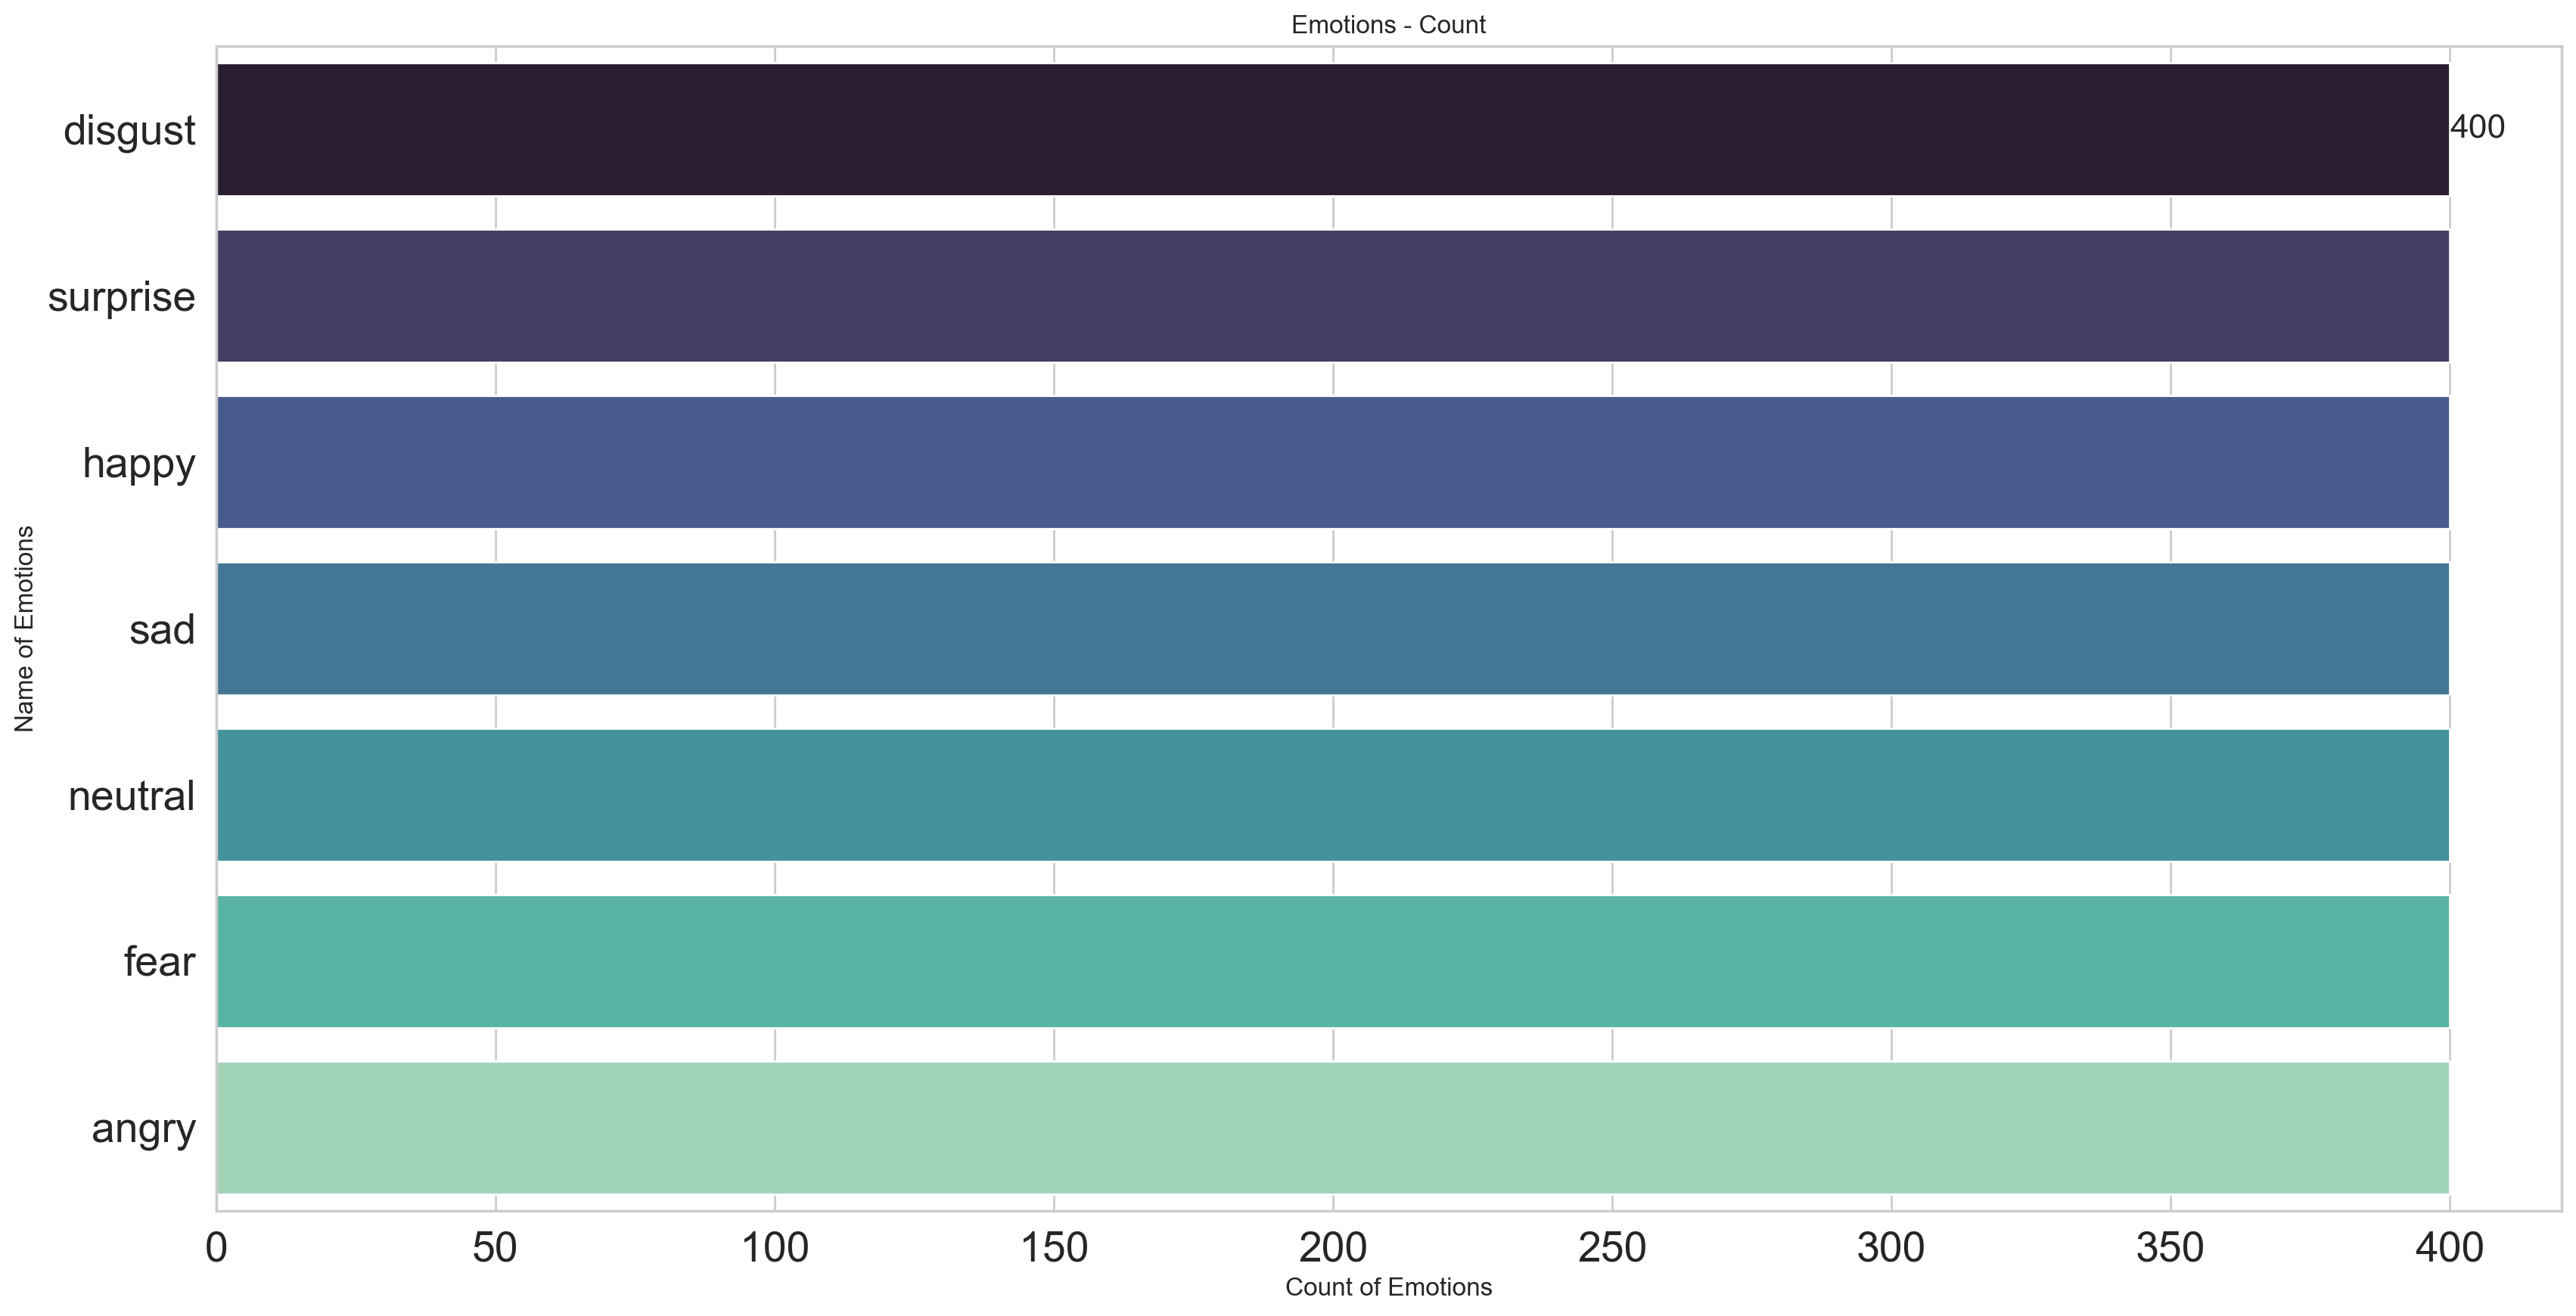

In [27]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Tess_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions")
plt.xlabel("Count of Emotions")
plt.title("Emotions - Count")
plt.show()

In [28]:
Sum_df = pd.concat([Crema_df, Ravdess_df, Savee_df, Tess_df], axis = 0)
Sum_df.to_csv("Sum_df.csv",index=False)
Sum_df.head()

Emotions                                               Path
0    angry  data/kaggle/input/speech-emotion-recognition-e...
1    angry  data/kaggle/input/speech-emotion-recognition-e...
2  neutral  data/kaggle/input/speech-emotion-recognition-e...
3  neutral  data/kaggle/input/speech-emotion-recognition-e...
4  disgust  data/kaggle/input/speech-emotion-recognition-e...

In [29]:
[Sum_df["Emotions"].unique().tolist() for i in Sum_df.columns]

[['angry',
  'neutral',
  'disgust',
  'sad',
  'fear',
  'happy',
  'surprise',
  'calm',
  'sadness',
  'happiness'],
 ['angry',
  'neutral',
  'disgust',
  'sad',
  'fear',
  'happy',
  'surprise',
  'calm',
  'sadness',
  'happiness']]

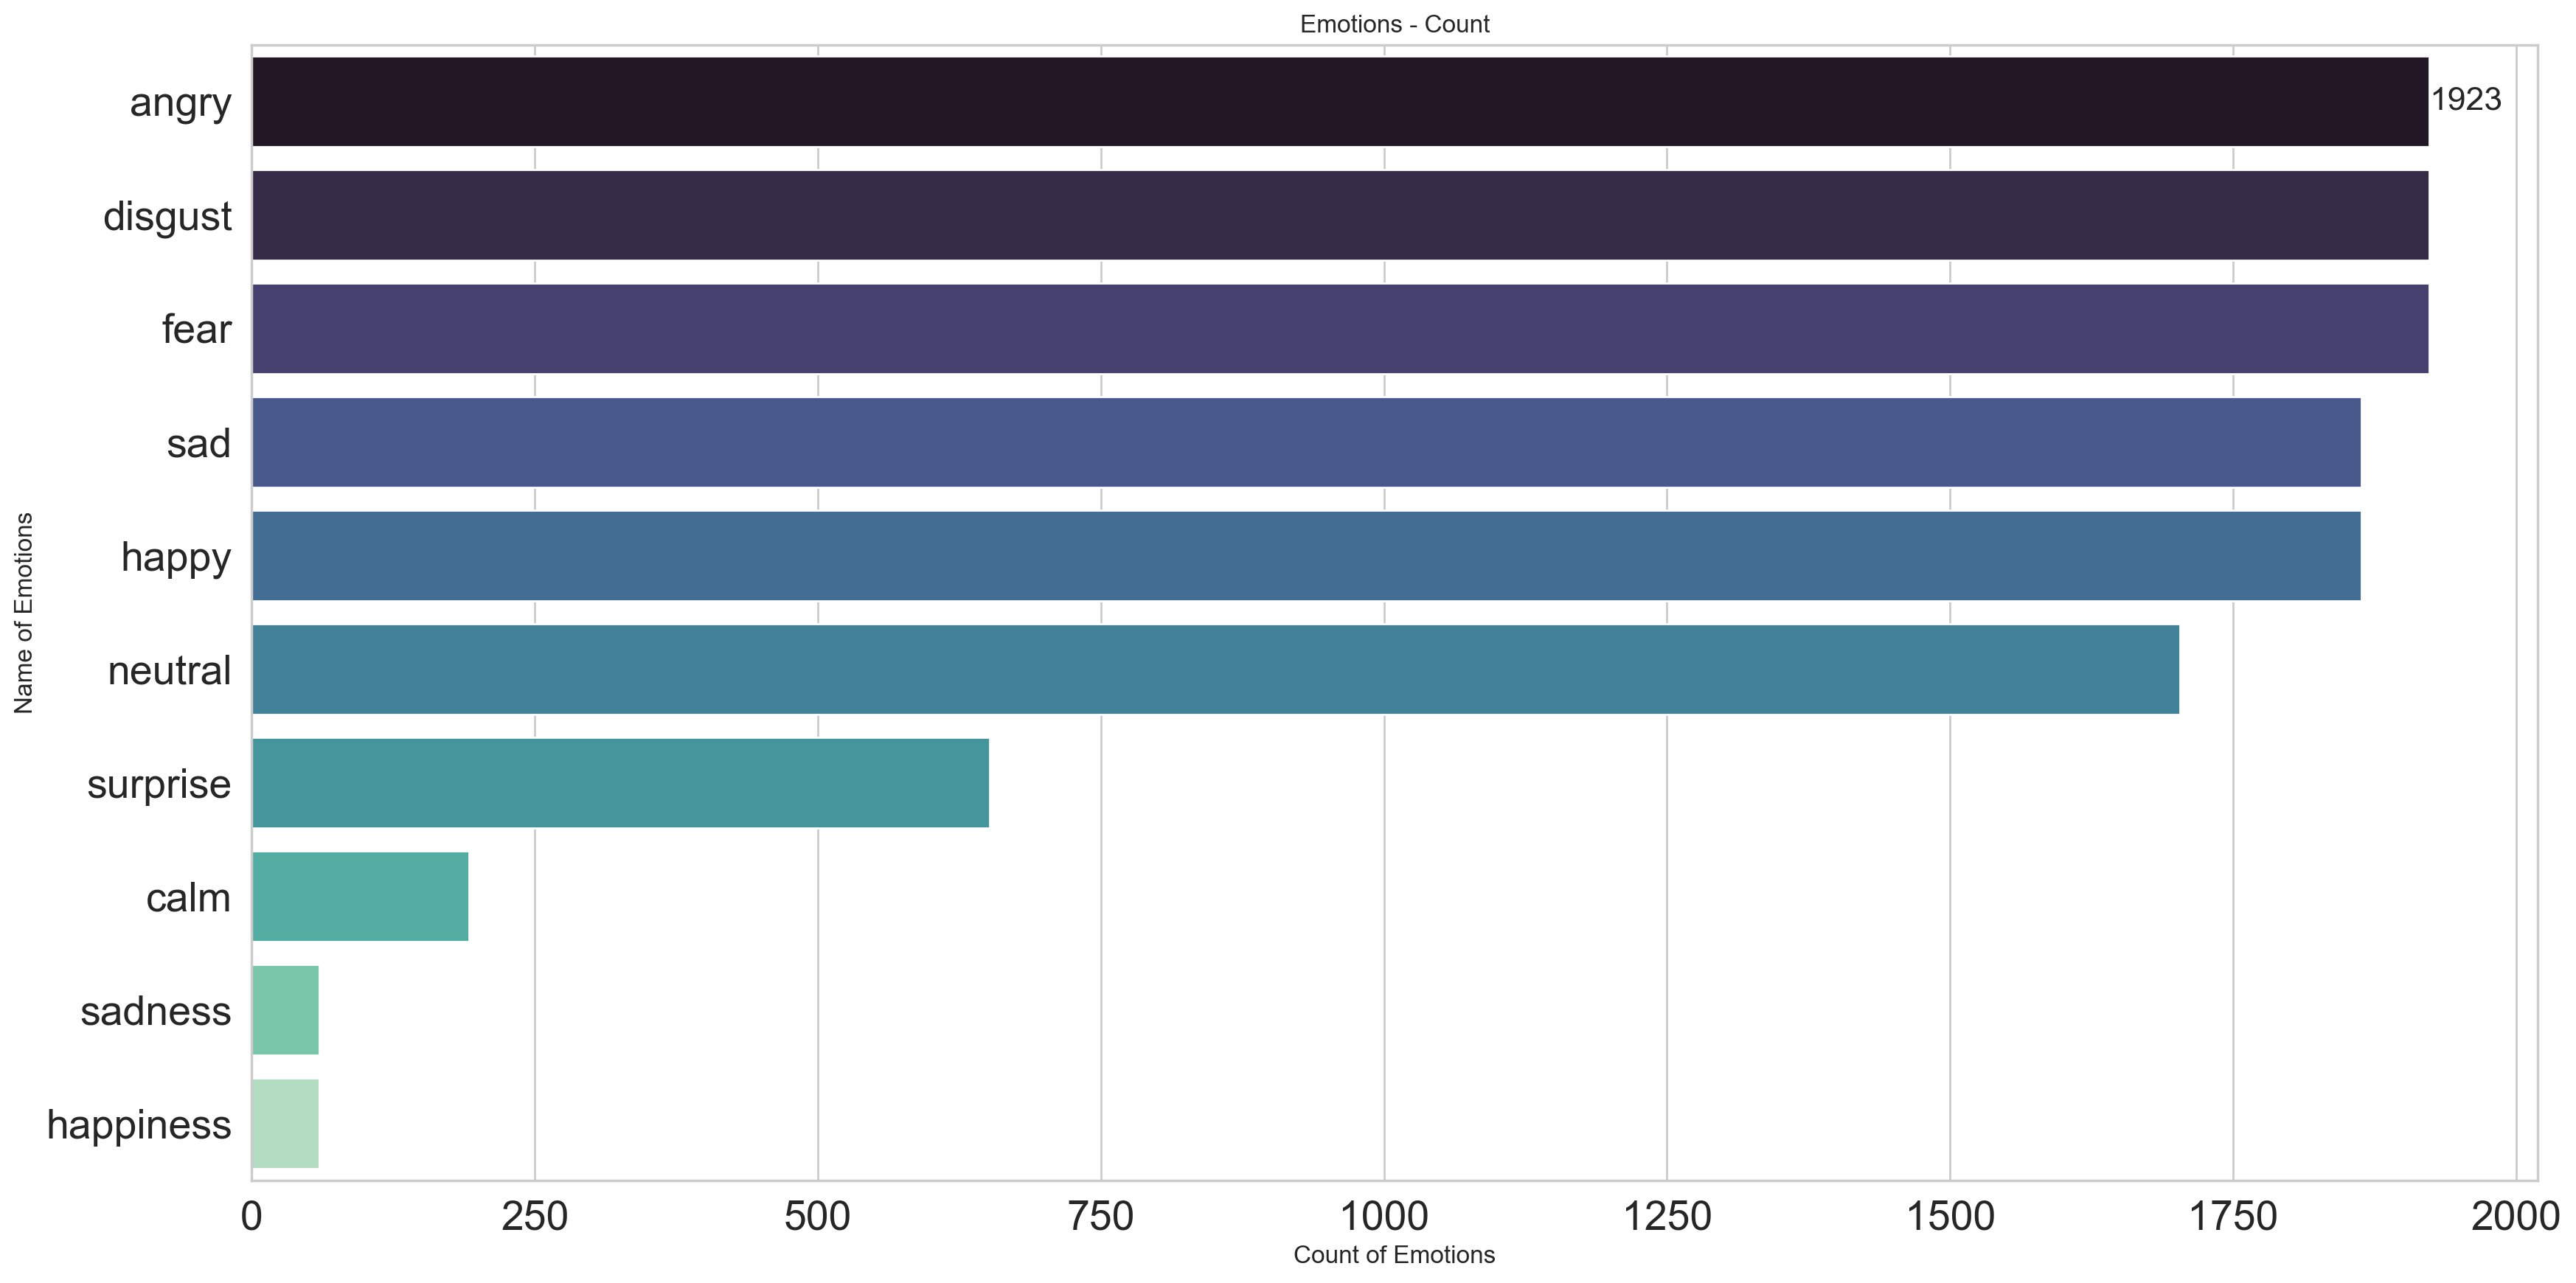

In [30]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Sum_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions")
plt.xlabel("Count of Emotions")
plt.title("Emotions - Count")
plt.show()

In [31]:
Sum_df_rep = Sum_df
Sum_df_rep['Emotions'].replace('happiness', 'happy', inplace=True)
Sum_df_rep['Emotions'].replace('sadness', 'sad', inplace=True)
Sum_df_rep['Emotions'].replace('calm', 'neutral', inplace=True)

In [32]:
[Sum_df_rep["Emotions"].unique().tolist() for i in Sum_df_rep.columns]

[['angry', 'neutral', 'disgust', 'sad', 'fear', 'happy', 'surprise'],
 ['angry', 'neutral', 'disgust', 'sad', 'fear', 'happy', 'surprise']]

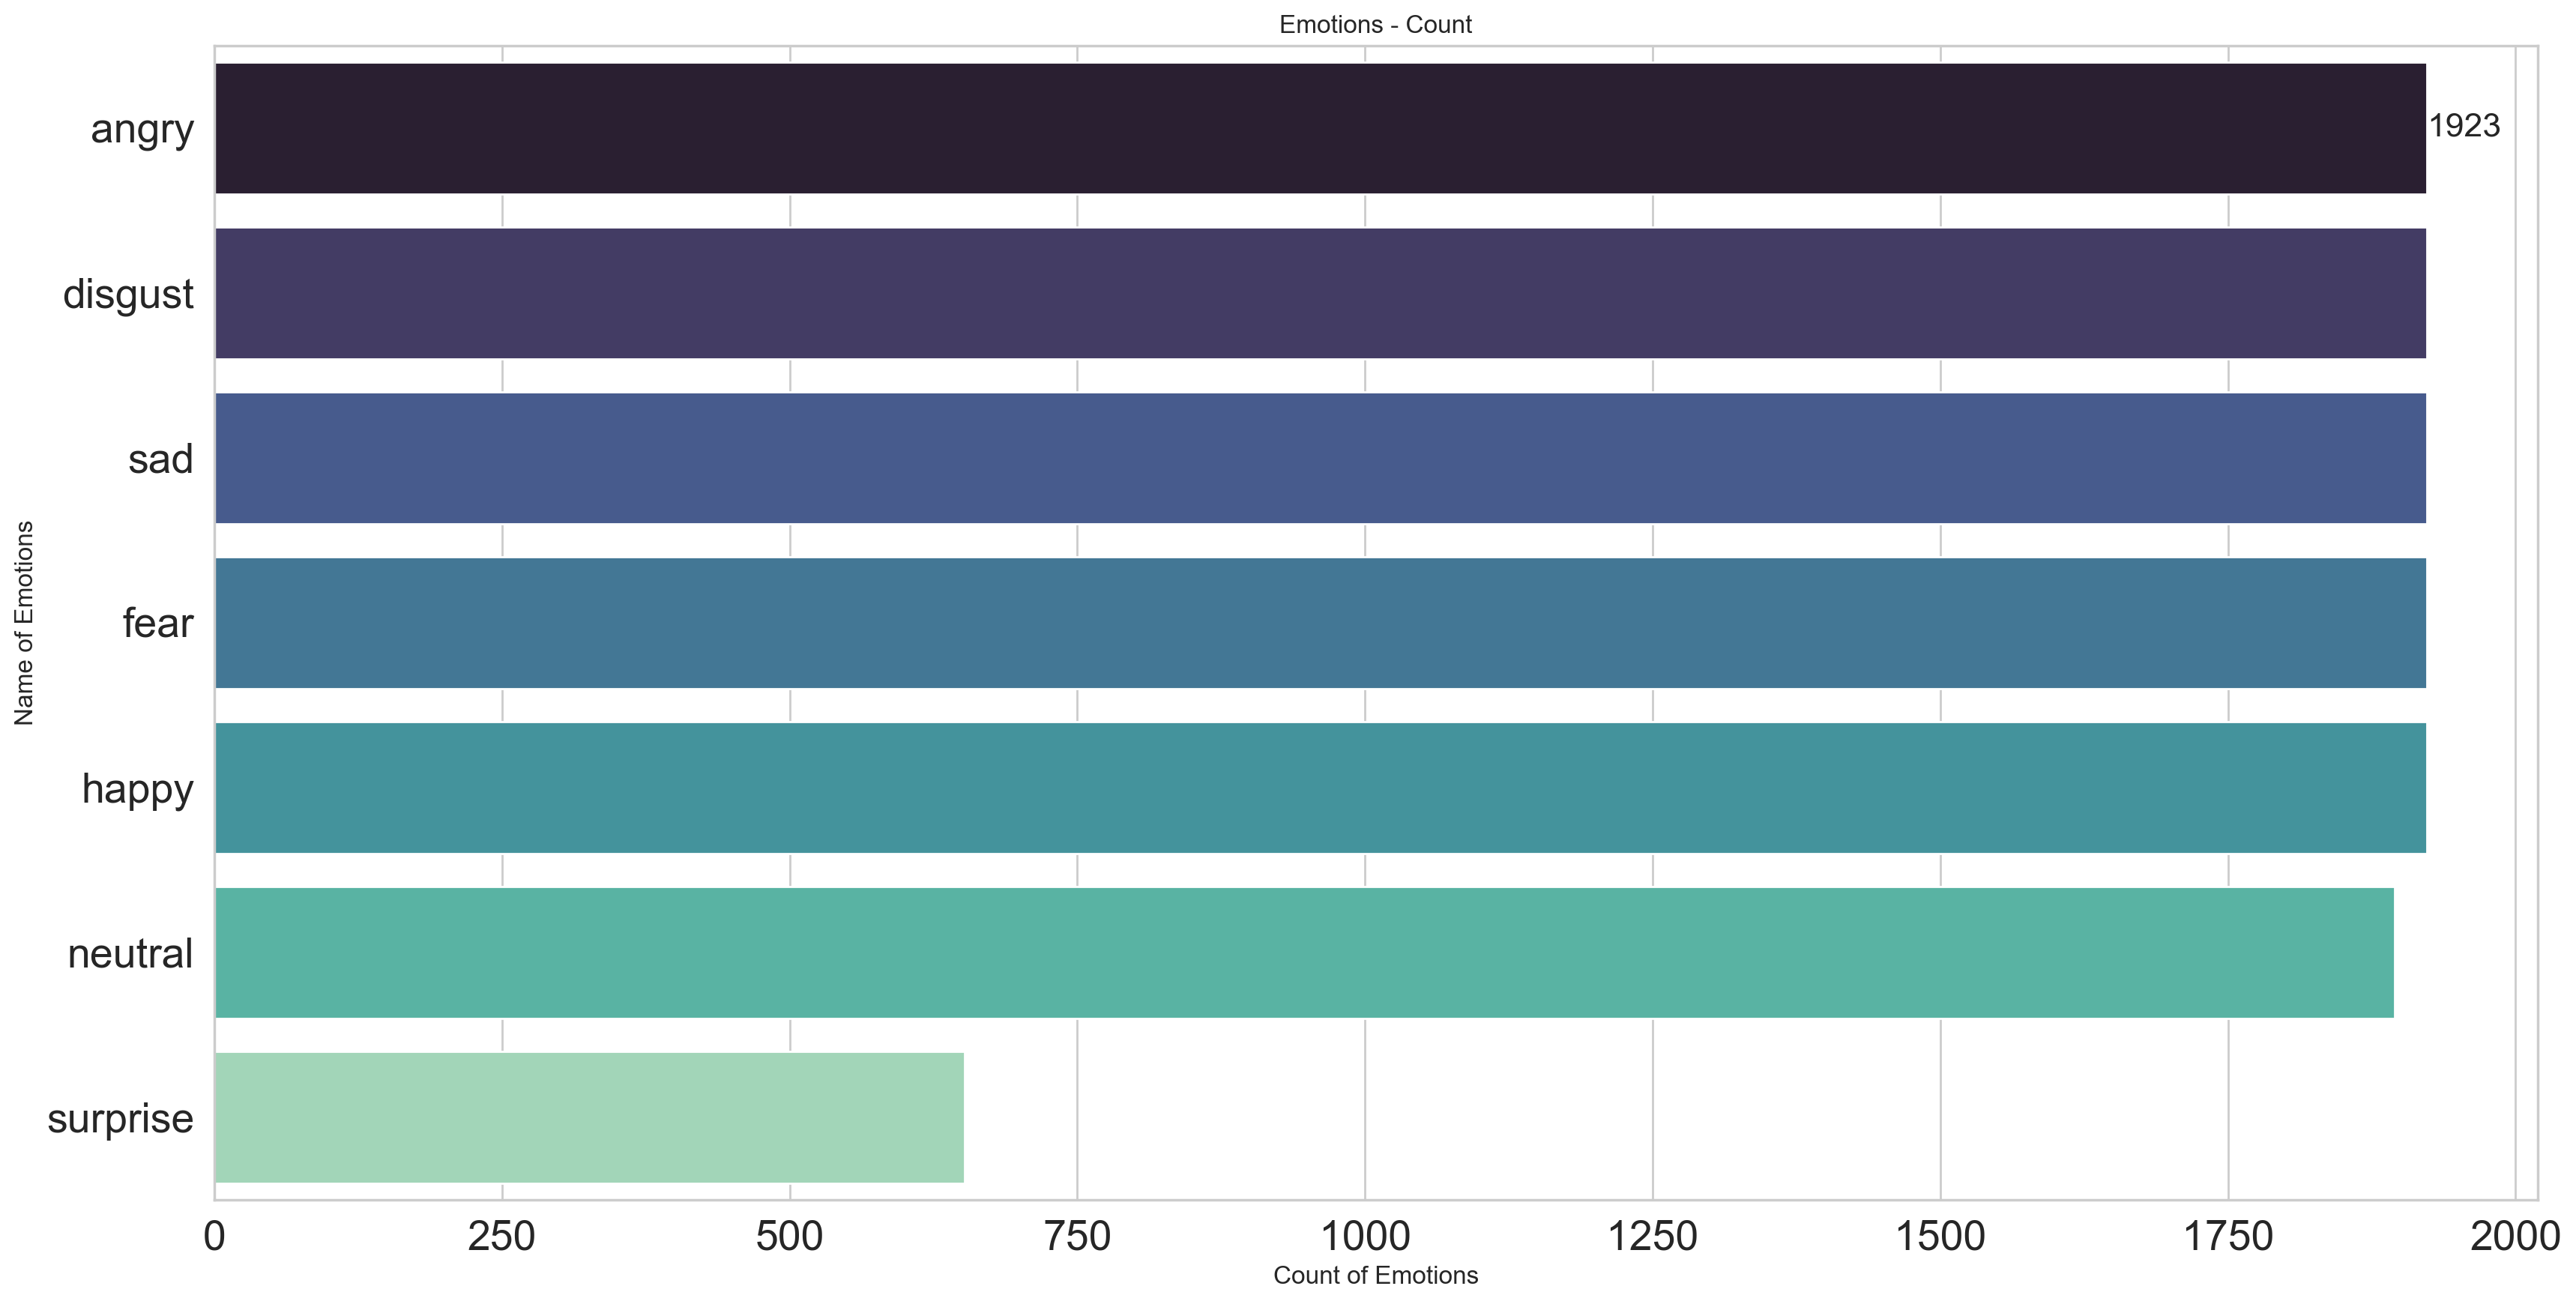

In [33]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Sum_df_rep['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions")
plt.xlabel("Count of Emotions")
plt.title("Emotions - Count")
plt.show()

In [39]:
%%time
audio_arrays = []

for i, path in enumerate(Sum_df_rep['Path']):
    y, sr = librosa.load(path, sr=44100)
    audio_arrays.append(y)
    print(f"{i+1}/{len(Sum_df_rep)}", end="\r")
    
Sum_df_rep['Arrays'] = audio_arrays

CPU times: user 10.2 s, sys: 2.11 s, total: 12.3 s
Wall time: 20.3 s


In [40]:
Sum_df_rep.head()

Emotions                                               Path  \
0    angry  data/kaggle/input/speech-emotion-recognition-e...   
1    angry  data/kaggle/input/speech-emotion-recognition-e...   
2  neutral  data/kaggle/input/speech-emotion-recognition-e...   
3  neutral  data/kaggle/input/speech-emotion-recognition-e...   
4  disgust  data/kaggle/input/speech-emotion-recognition-e...   

                                              Arrays  
0  [0.00022397174, -9.429426e-05, -0.0007466104, ...  
1  [0.000112782494, 0.00013394406, 0.00010201089,...  
2  [0.0022768811, 0.0030965768, 0.0031128167, 0.0...  
3  [-0.002233105, -0.00264515, -0.00222969, -0.00...  
4  [-0.004840348, -0.0061861426, -0.0059352717, -...

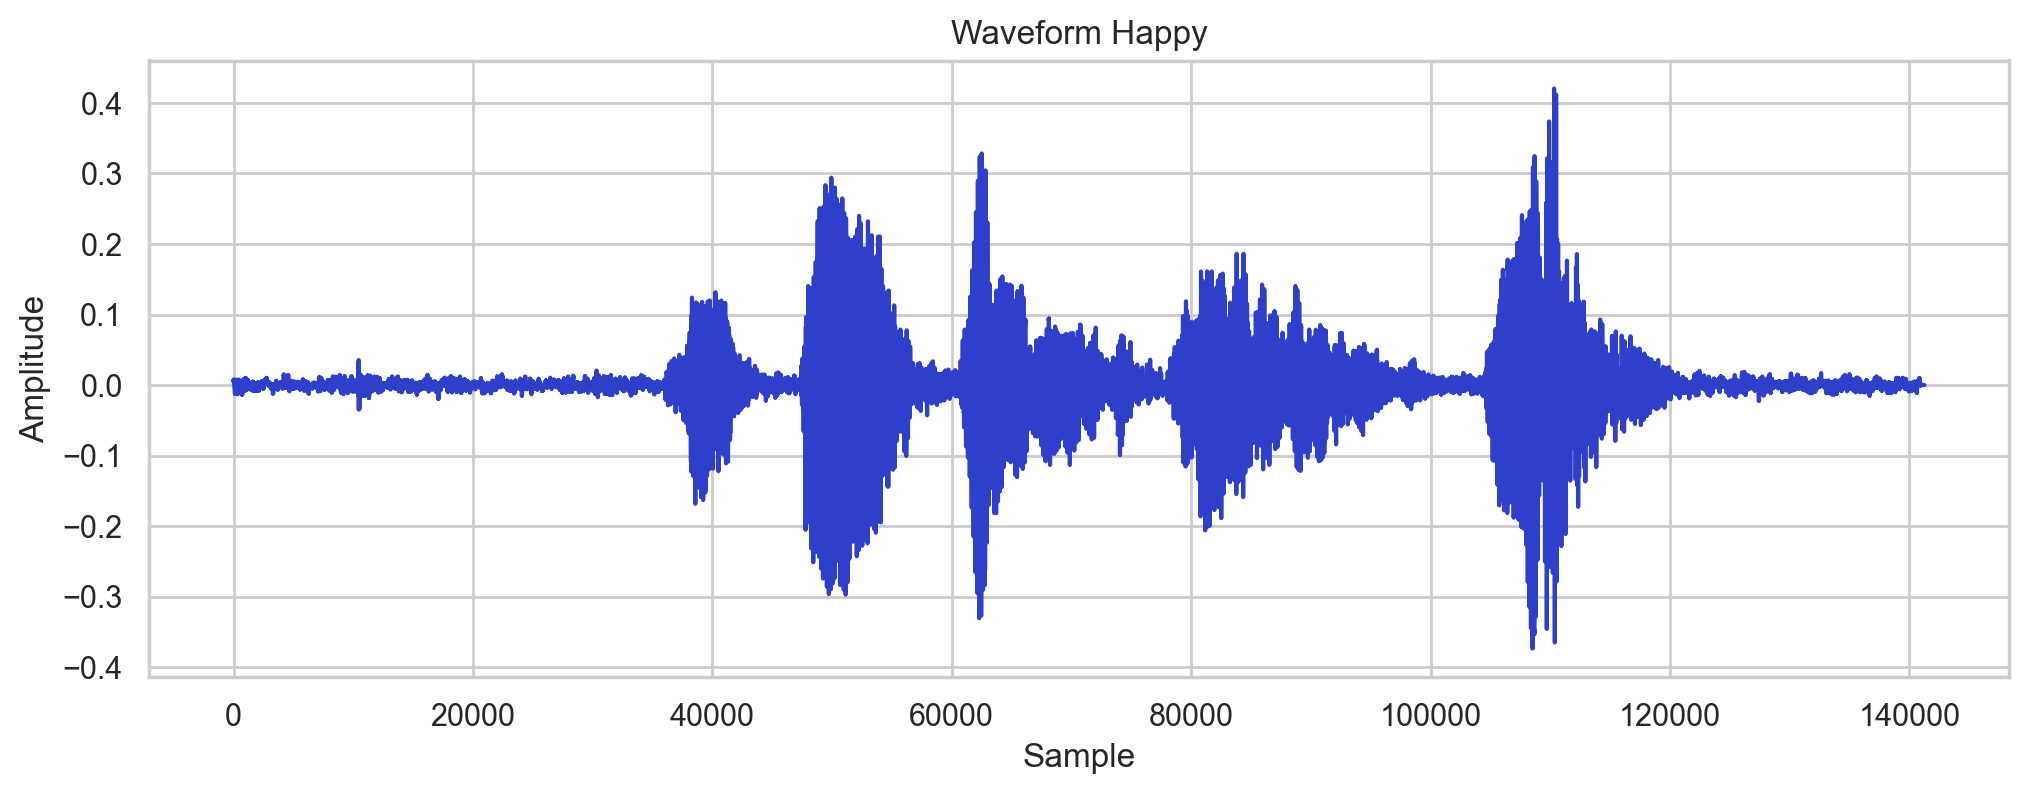

In [41]:
happy_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'happy']['Path']
happy_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'happy']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Happy')
plt.show()

Audio(happy_sp.iloc[0])

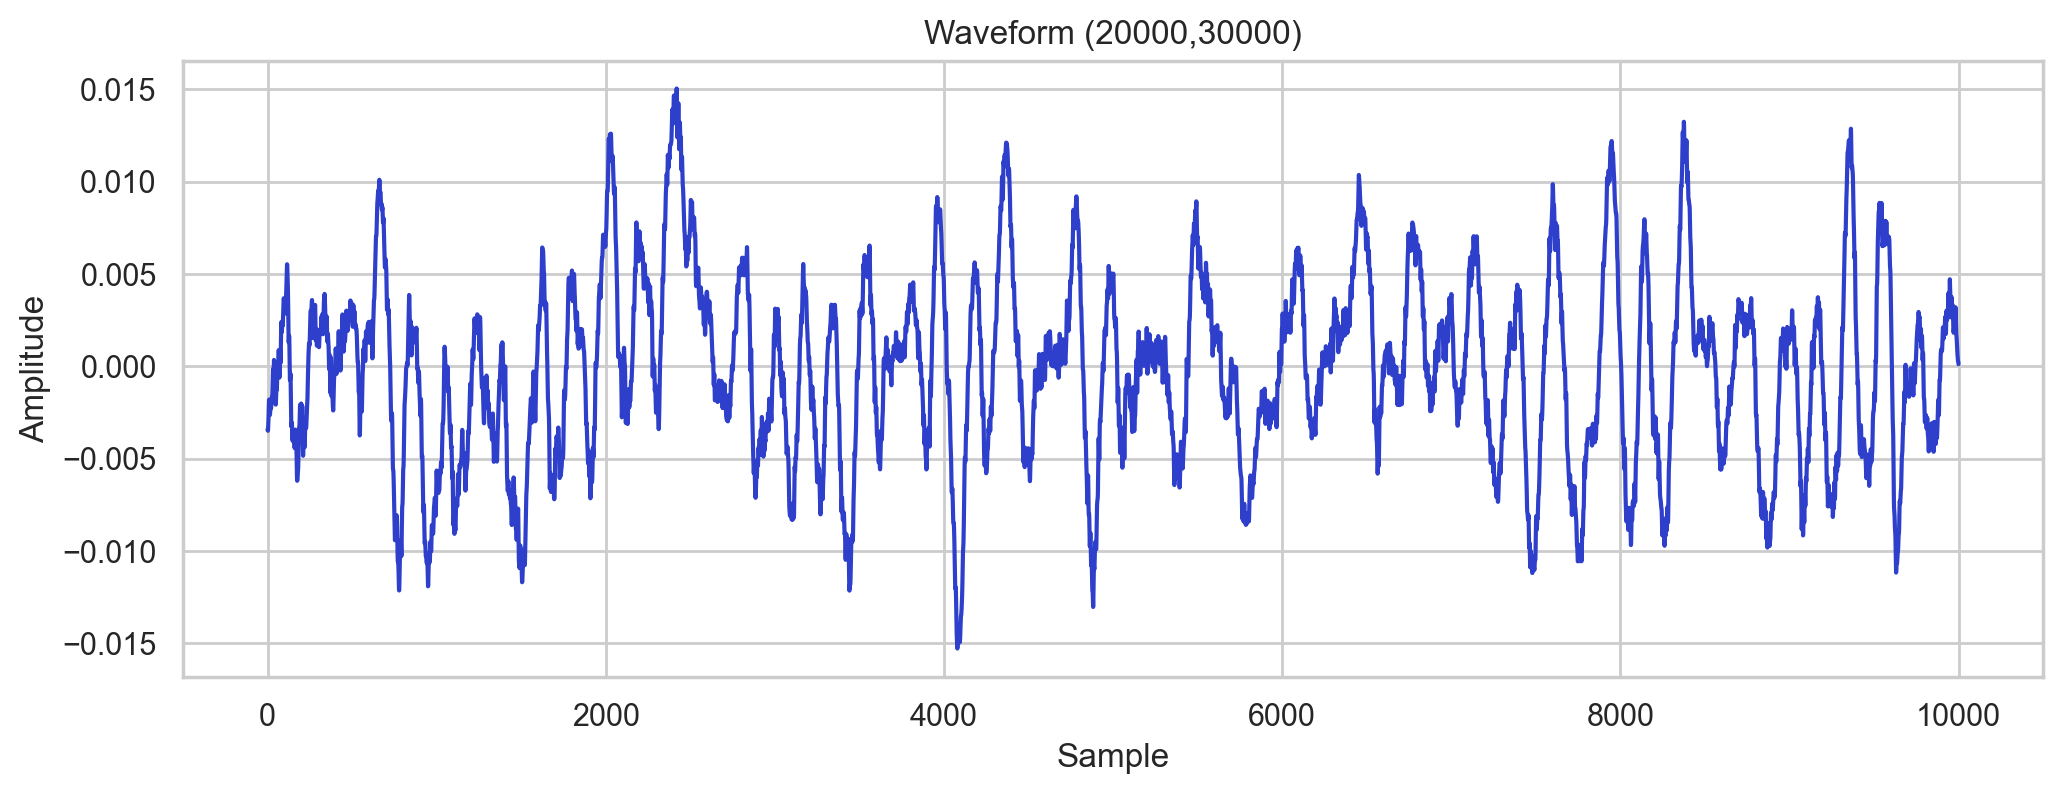

In [42]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0][20000:30000], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform (20000,30000)')
plt.show()

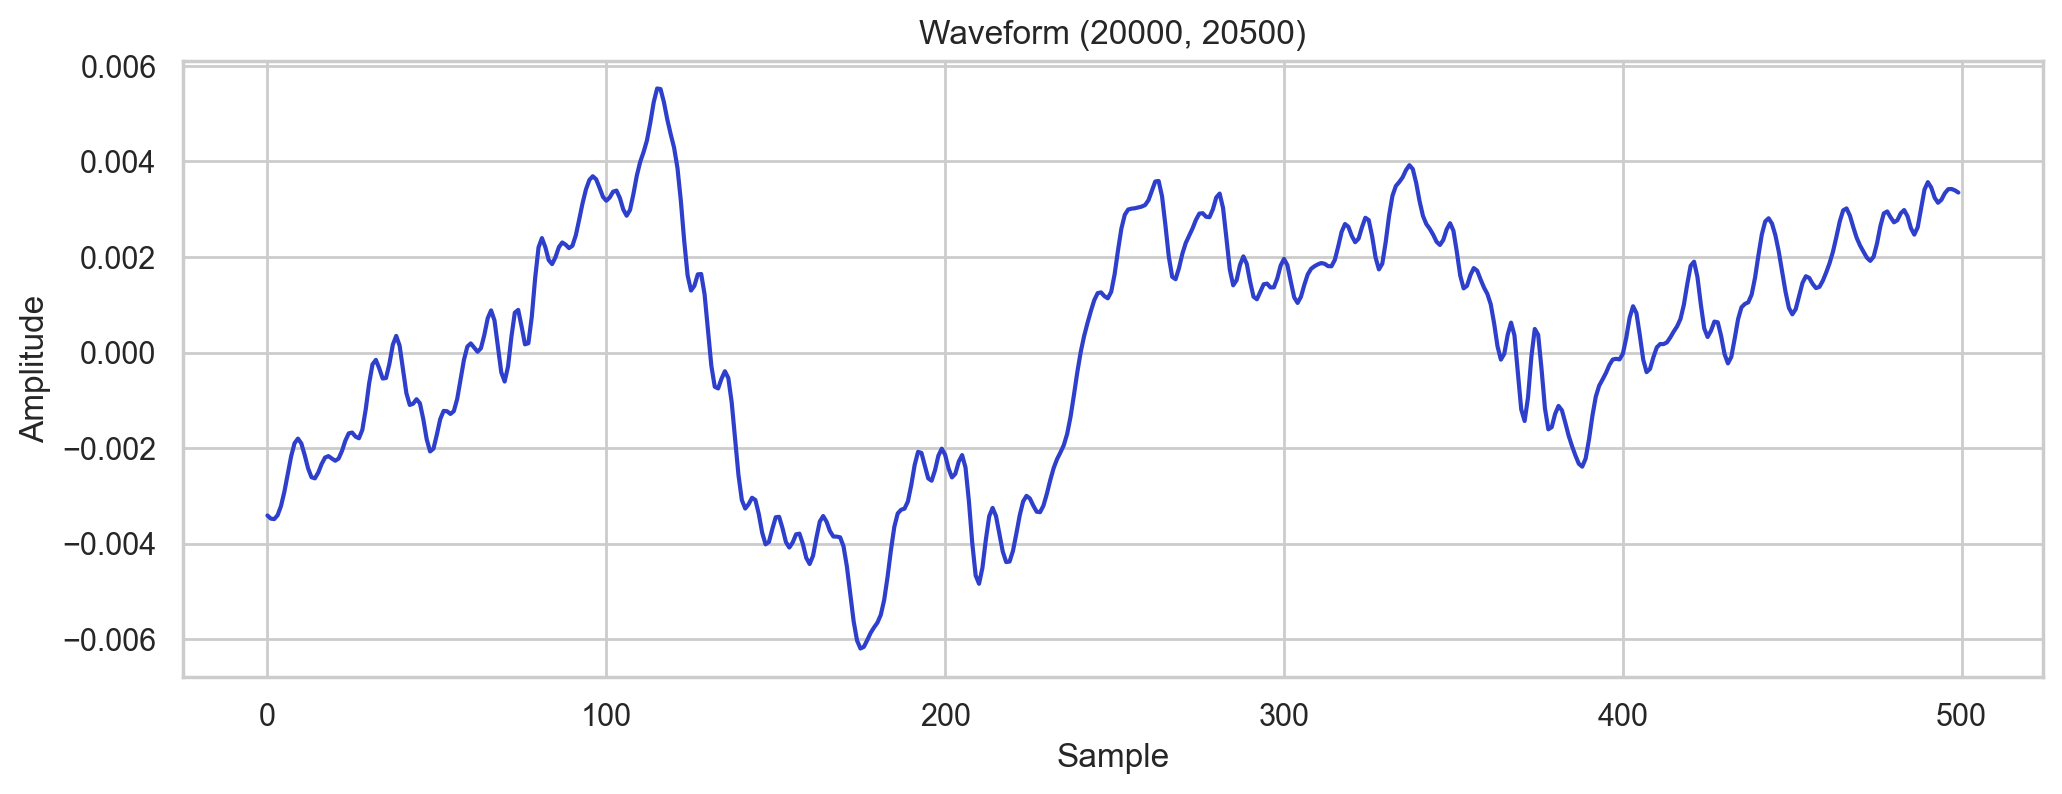

In [43]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0][20000:20500], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform (20000, 20500)')
plt.show()

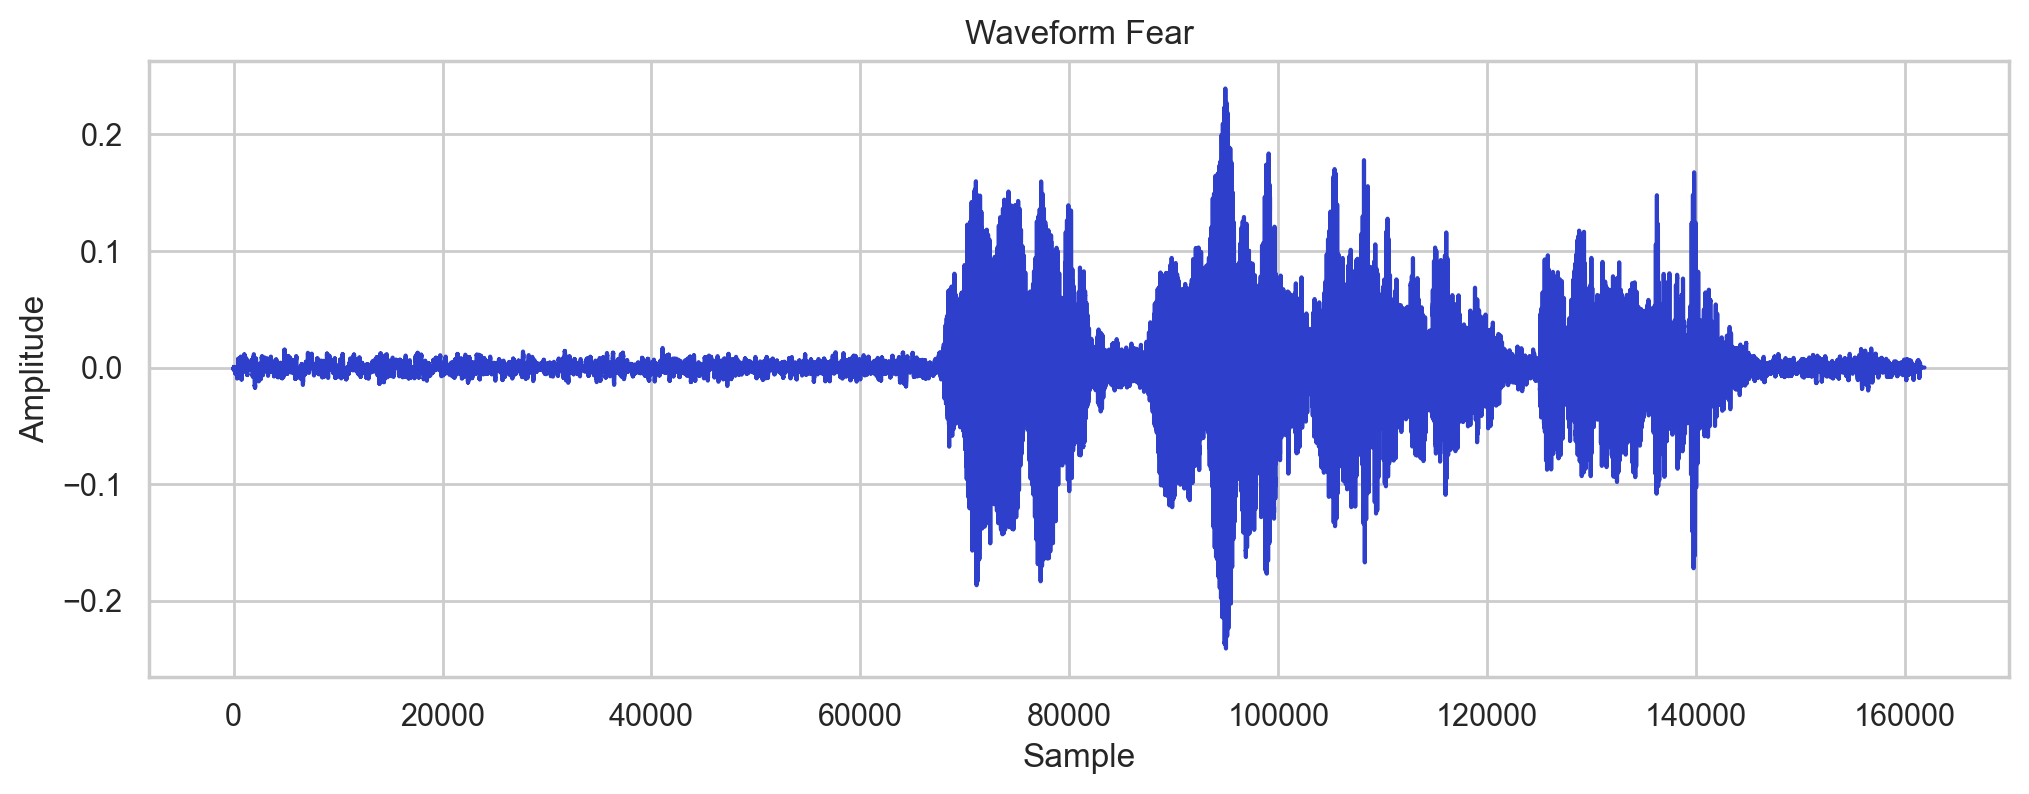

In [44]:
fear_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'fear']['Path']
fear_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'fear']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(fear_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Fear')
plt.show()

Audio(fear_sp.iloc[0])

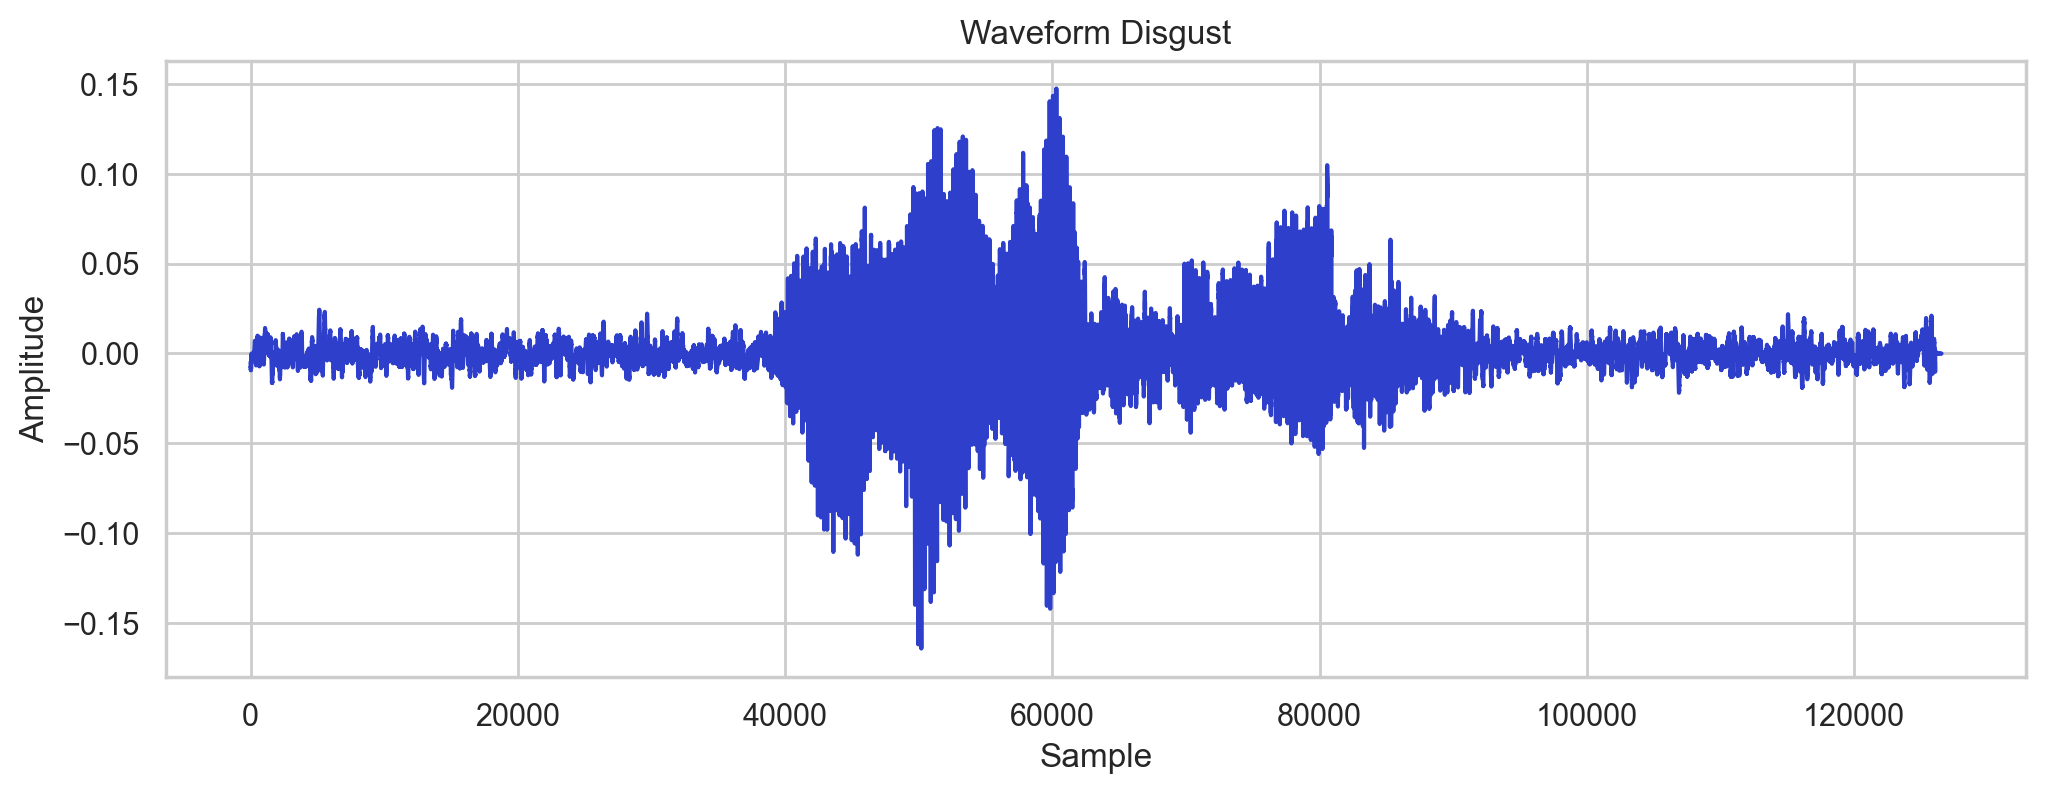

In [45]:
disgust_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'disgust']['Path']
disgust_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'disgust']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(disgust_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Disgust')
plt.show()

Audio(disgust_sp.iloc[0])

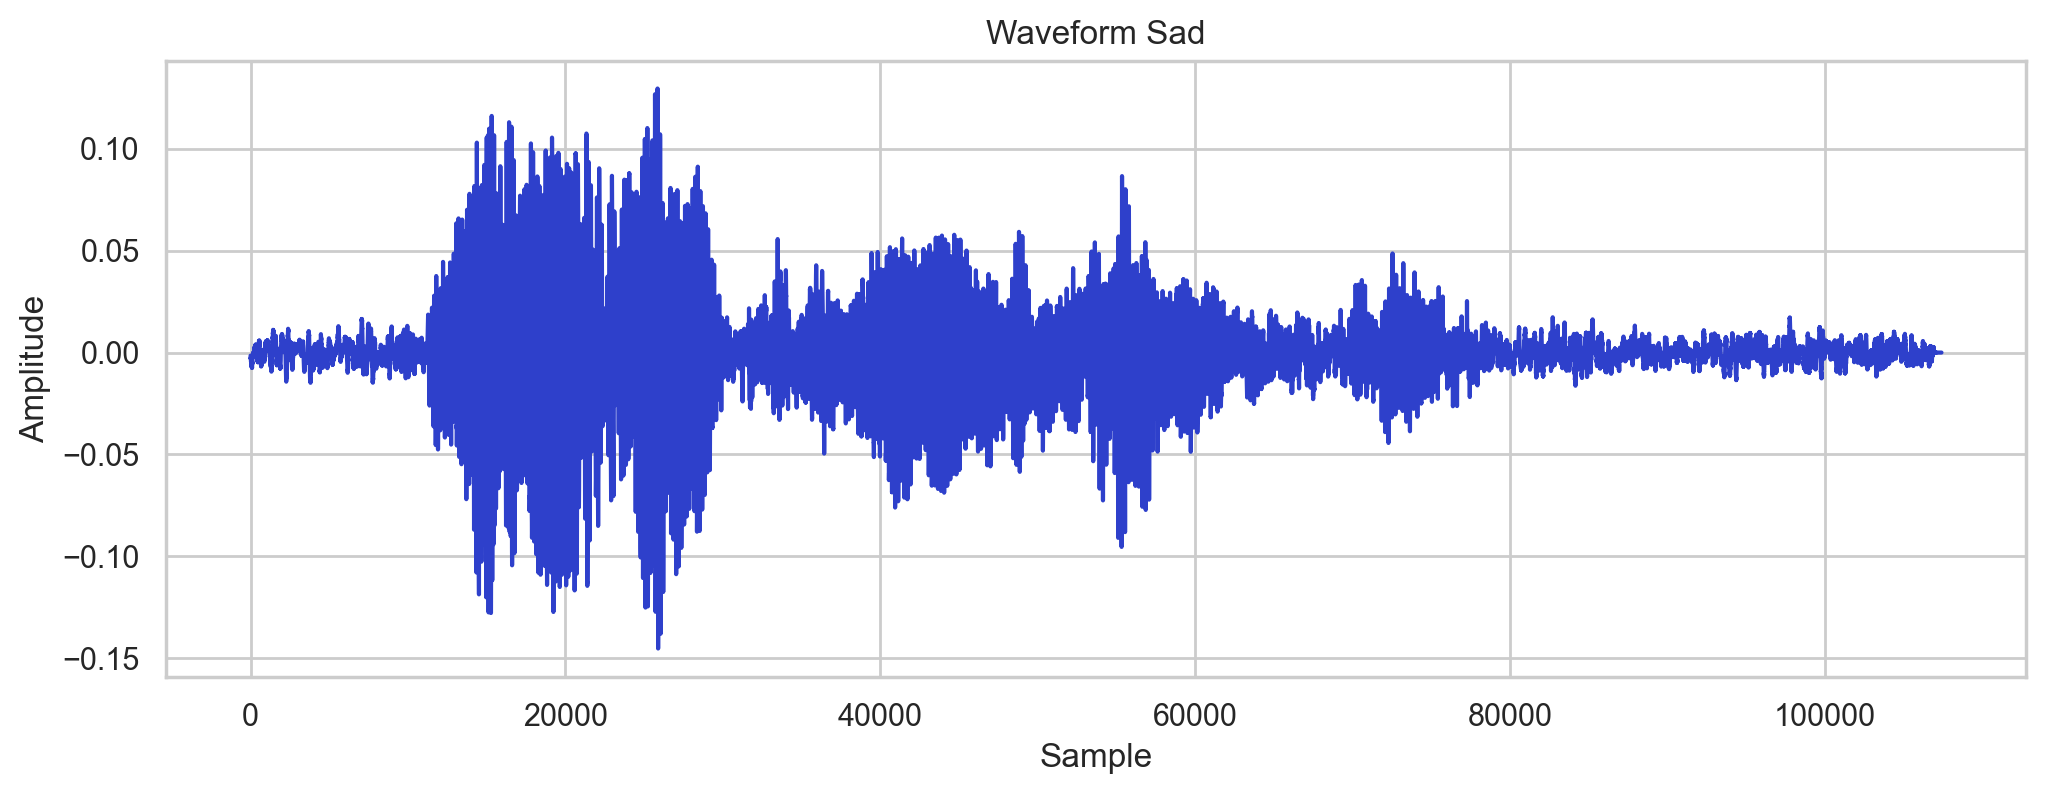

In [46]:
sad_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'sad']['Path']
sad_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'sad']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(sad_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Sad')
plt.show()

Audio(sad_sp.iloc[0])

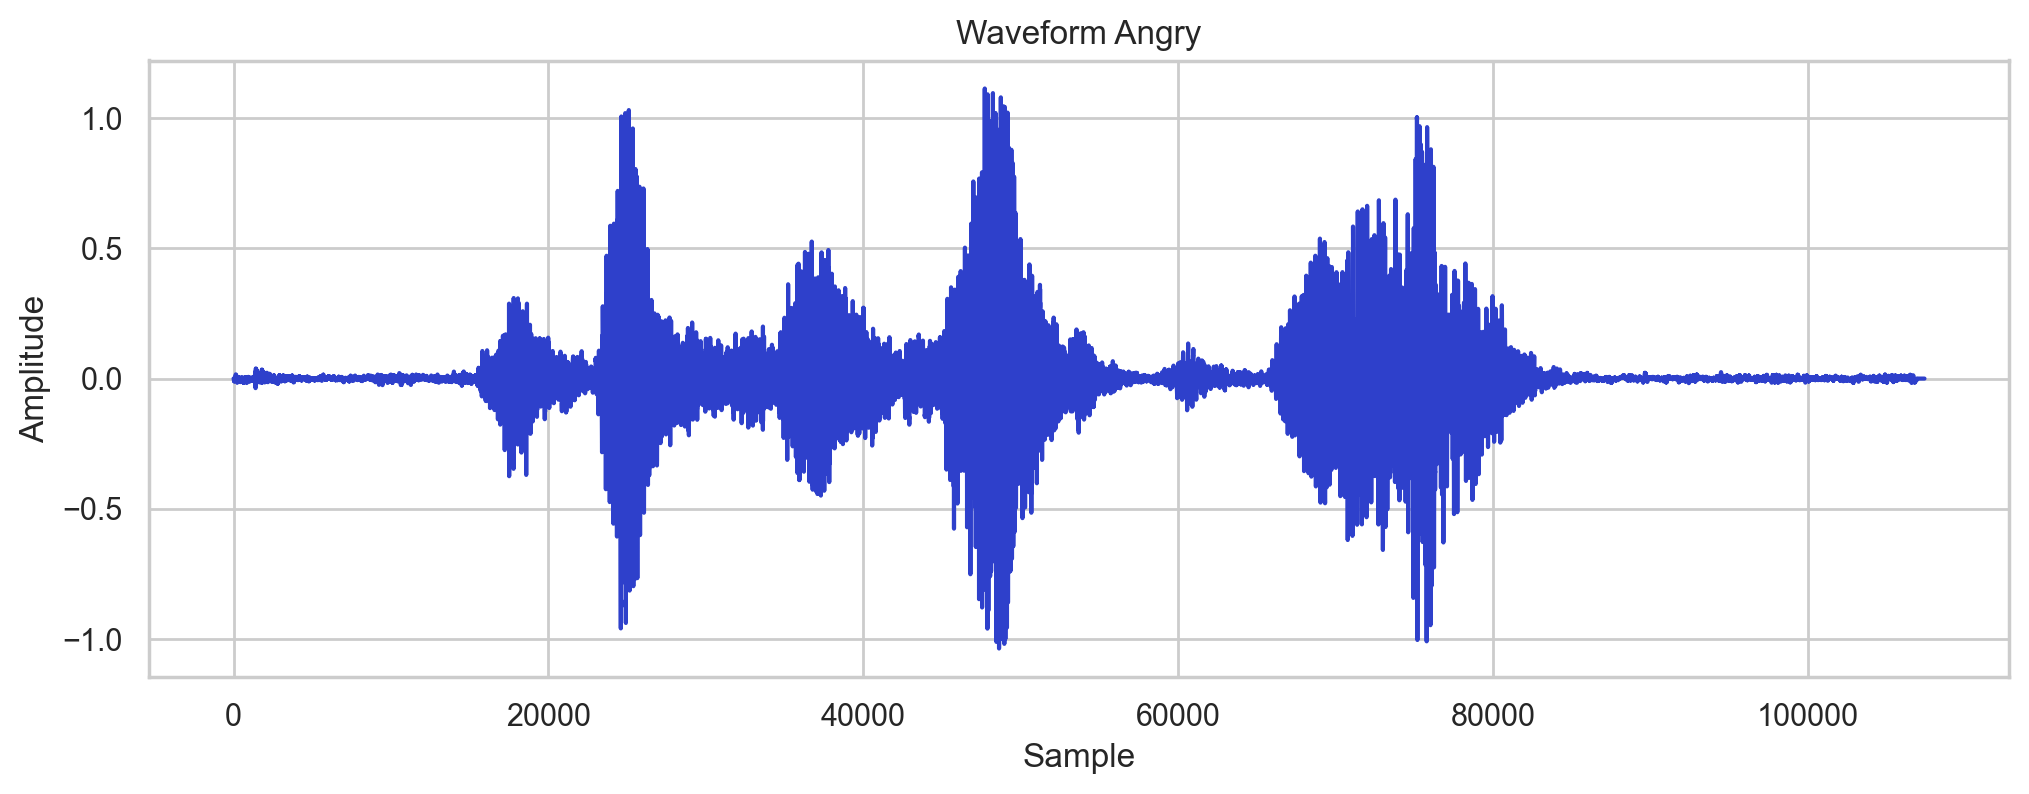

In [47]:
angry_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'angry']['Path']
angry_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'angry']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(angry_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Angry')
plt.show()

Audio(angry_sp.iloc[0])

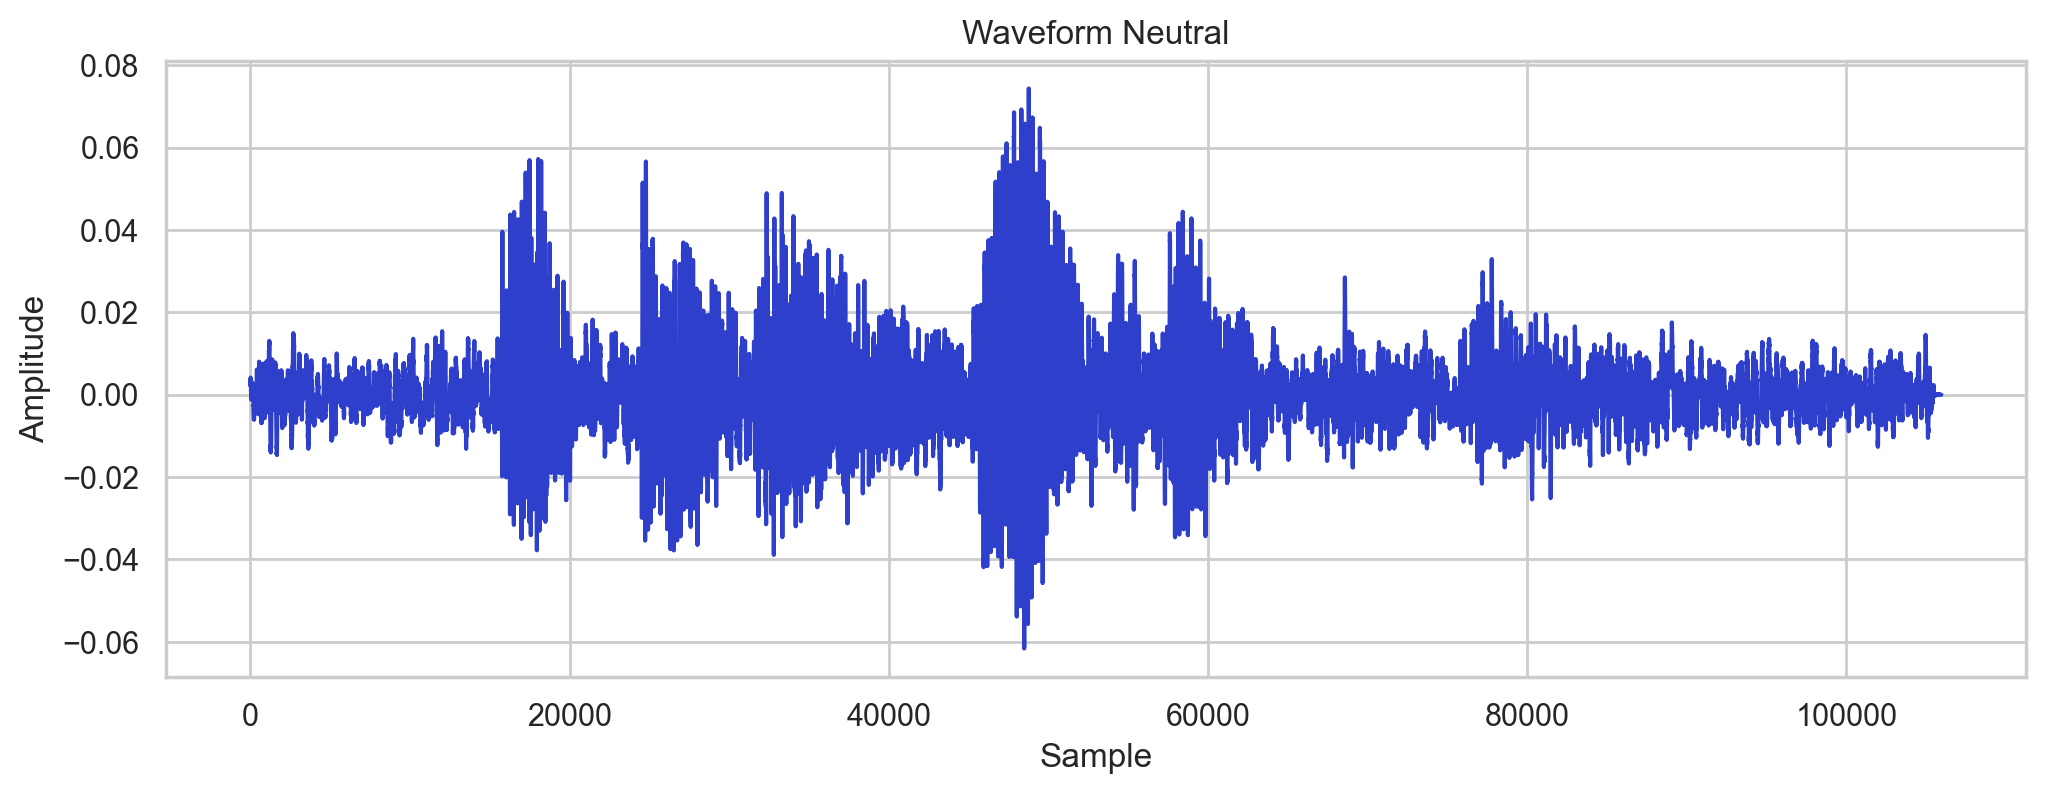

In [48]:
neutral_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'neutral']['Path']
neutral_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'neutral']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(neutral_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Neutral')
plt.show()

Audio(neutral_sp.iloc[0])

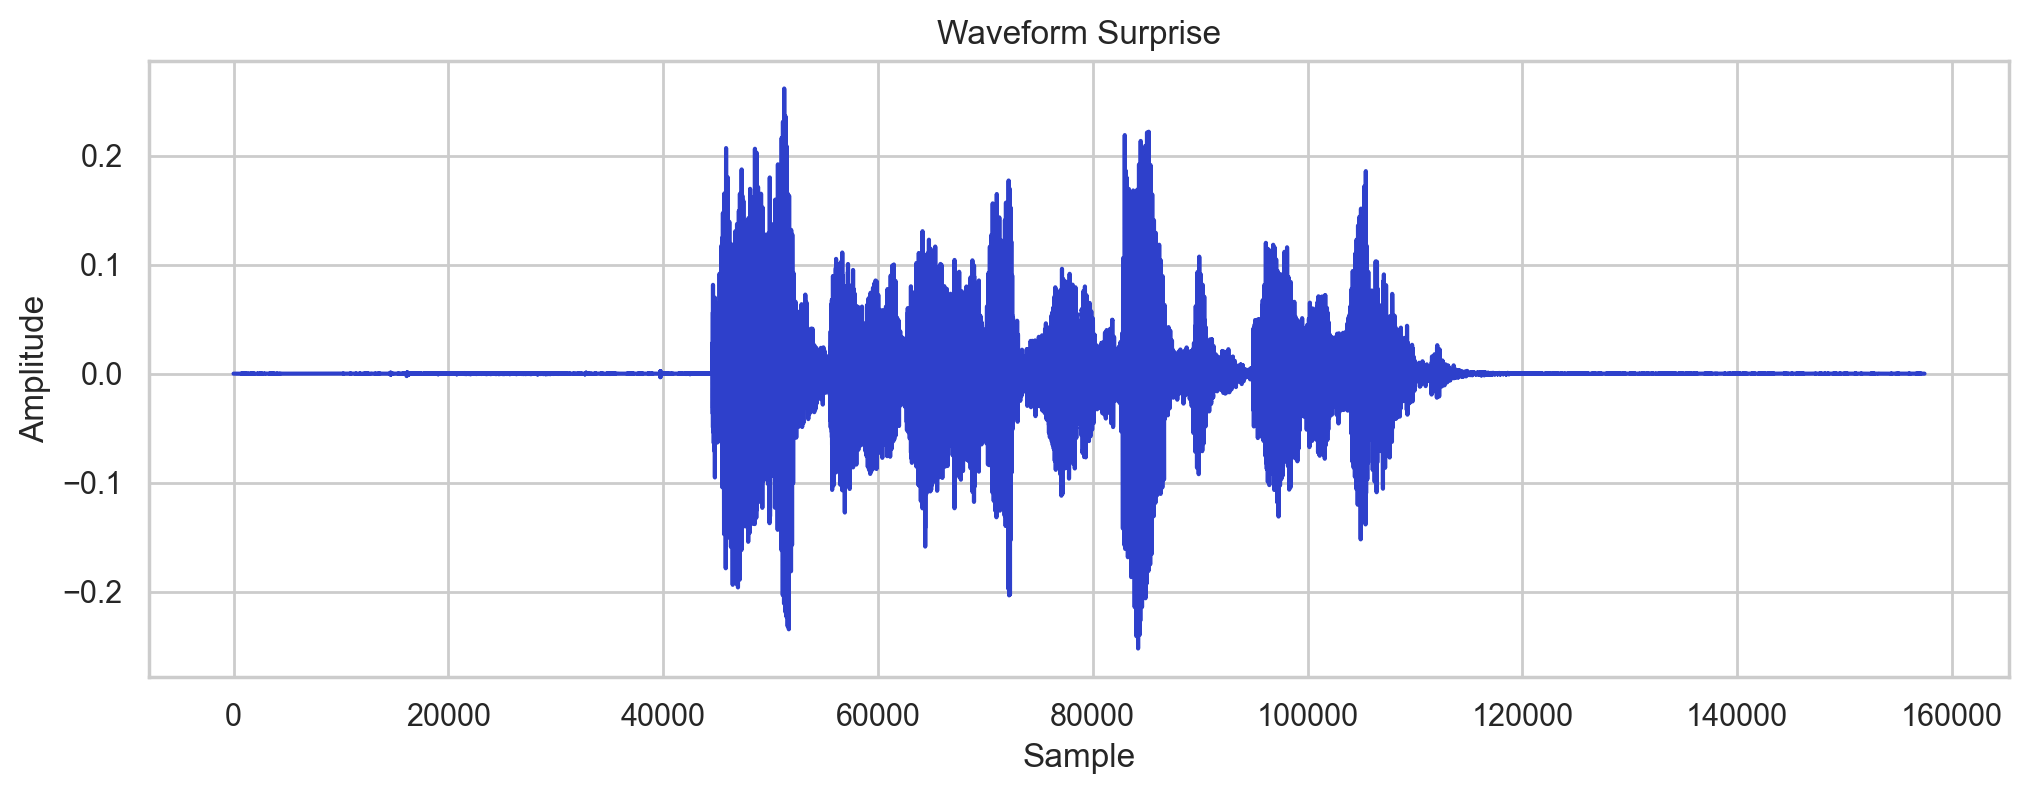

In [49]:
surprise_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'surprise']['Path']
surprise_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'surprise']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(surprise_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Surprise')
plt.show()

Audio(surprise_sp.iloc[0])

In [50]:
sample_duration = 1/sr
print(sample_duration)

2.2675736961451248e-05


In [51]:
#duration of the audio signals in seconds
duration = sample_duration * len(audio_arrays)
print(f"Duration of signal is: {duration:.2f} seconds")

Duration of signal is: 0.28 seconds


In [52]:
Frame_size = 1024
#HOP =  Current frame how many samples shift to the right for calculating the next frame
Hop_lenght = 512 

#calculate the amplitude envelope

def amplitude_env (signal, frame_size, hop_length):
    amplitude_envelope = []
    
    #calculate AE (Amp Env) for each frame
    for i in range (0, len(signal), hop_length):
        current_frame_amplitude_env = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_env)
        
    return np.array(amplitude_envelope)


def fancy_amplitude_env (signal, frame_size, hop_length):
    
    return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])

In [53]:
# Samples

Sp_fear = fear_arr.iloc[0]
Sp_disgust= disgust_arr.iloc[0]
Sp_happy= happy_arr.iloc[0]
Sp_sad = sad_arr.iloc[0]
Sp_neutral = neutral_arr.iloc[0]
Sp_angry = angry_arr.iloc[0]
Sp_surprise = surprise_arr.iloc[0]

In [54]:
AE_fear = amplitude_env(Sp_fear, Frame_size, Hop_lenght)
AE_disgust = amplitude_env(Sp_disgust, Frame_size, Hop_lenght)
AE_happy = amplitude_env(Sp_happy, Frame_size, Hop_lenght)
AE_sad = amplitude_env(Sp_sad, Frame_size, Hop_lenght)
AE_neutral = amplitude_env(Sp_neutral, Frame_size, Hop_lenght)
AE_angry = amplitude_env(Sp_angry, Frame_size, Hop_lenght)
AE_surprise = amplitude_env(Sp_surprise, Frame_size, Hop_lenght)

print(len(AE_fear), len(AE_disgust), len(AE_angry), len(AE_happy), len(AE_neutral),
     len(AE_surprise), len(AE_sad))


317 248 210 276 207 308 210


In [55]:
fancy_AE_fear = fancy_amplitude_env(Sp_fear, Frame_size, Hop_lenght)
fancy_AE_disgust = fancy_amplitude_env(Sp_disgust, Frame_size, Hop_lenght)
fancy_AE_happy = fancy_amplitude_env(Sp_happy, Frame_size, Hop_lenght)
fancy_AE_sad = fancy_amplitude_env(Sp_sad, Frame_size, Hop_lenght)
fancy_AE_neutral = fancy_amplitude_env(Sp_neutral, Frame_size, Hop_lenght)
fancy_AE_angry = fancy_amplitude_env(Sp_angry, Frame_size, Hop_lenght)
fancy_AE_surprise = fancy_amplitude_env(Sp_surprise, Frame_size, Hop_lenght)

print(len(fancy_AE_fear), len(fancy_AE_disgust), len(fancy_AE_angry),
      len(fancy_AE_happy), len(fancy_AE_neutral),
     len(fancy_AE_surprise), len(fancy_AE_sad))

317 248 210 276 207 308 210


In [56]:
(AE_fear == fancy_AE_fear).all()

True

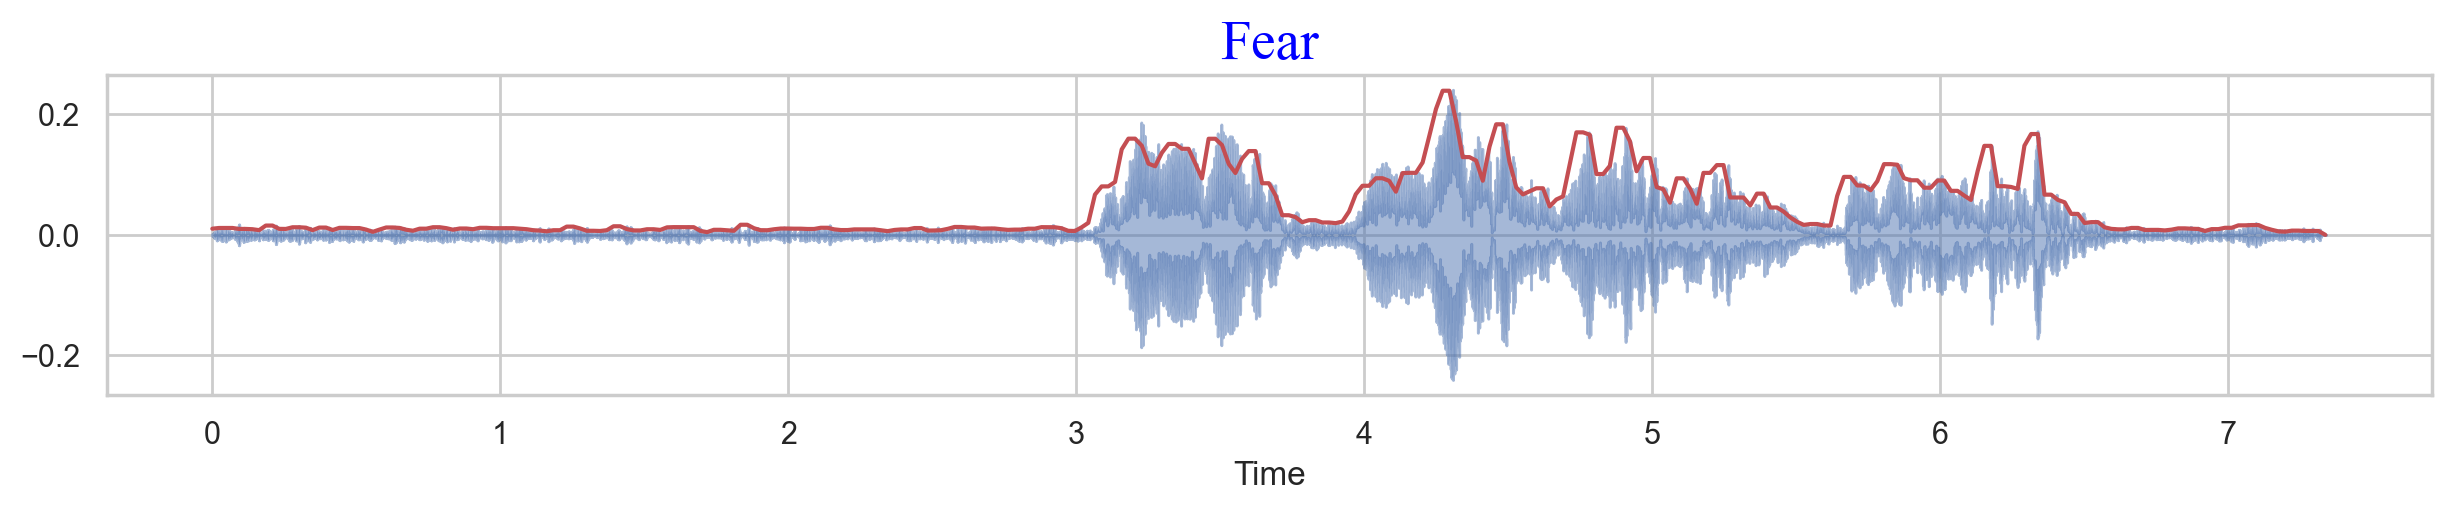

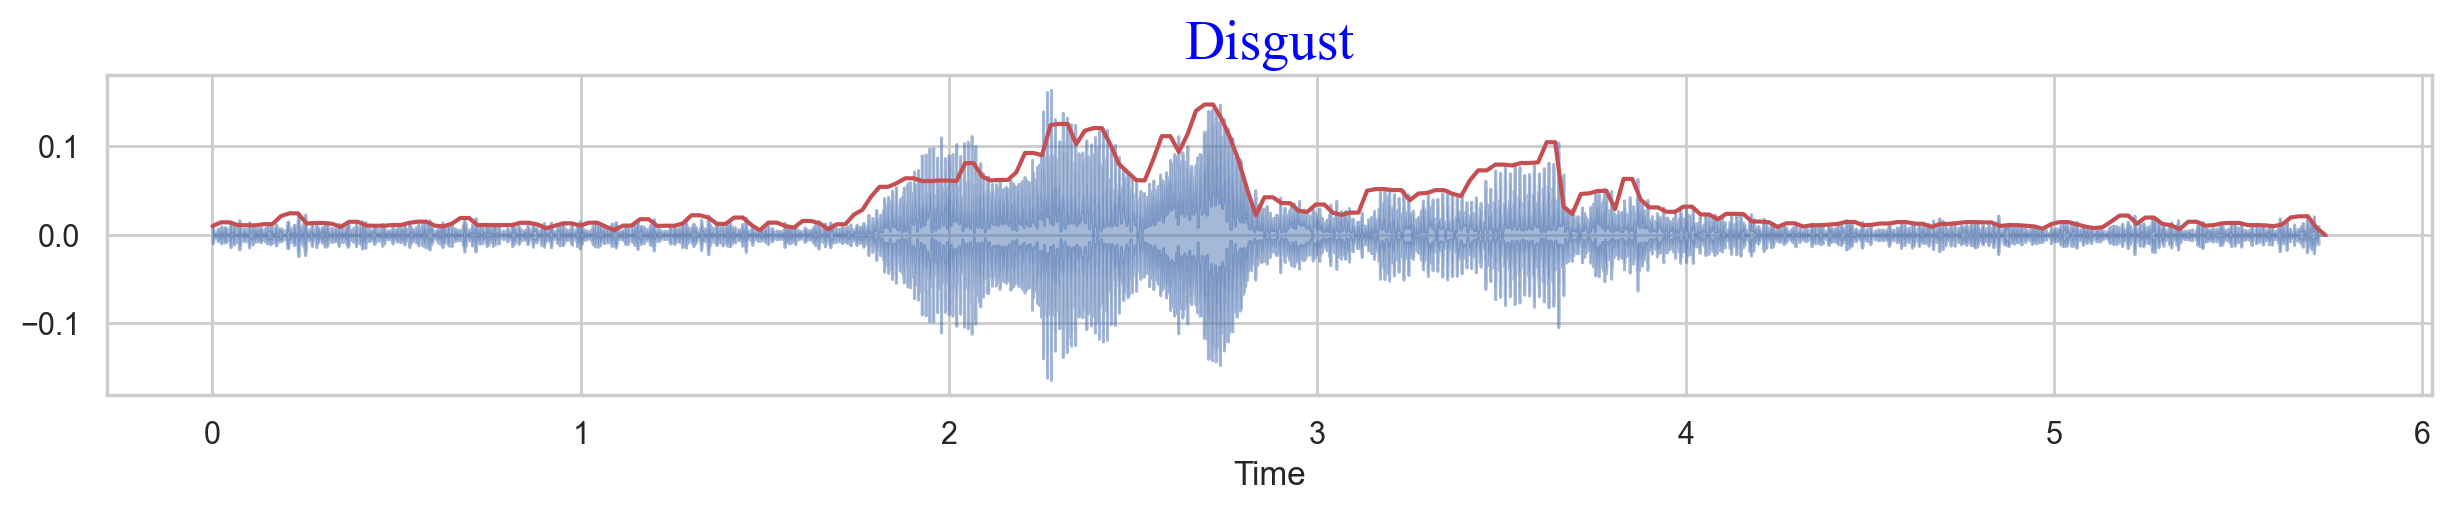

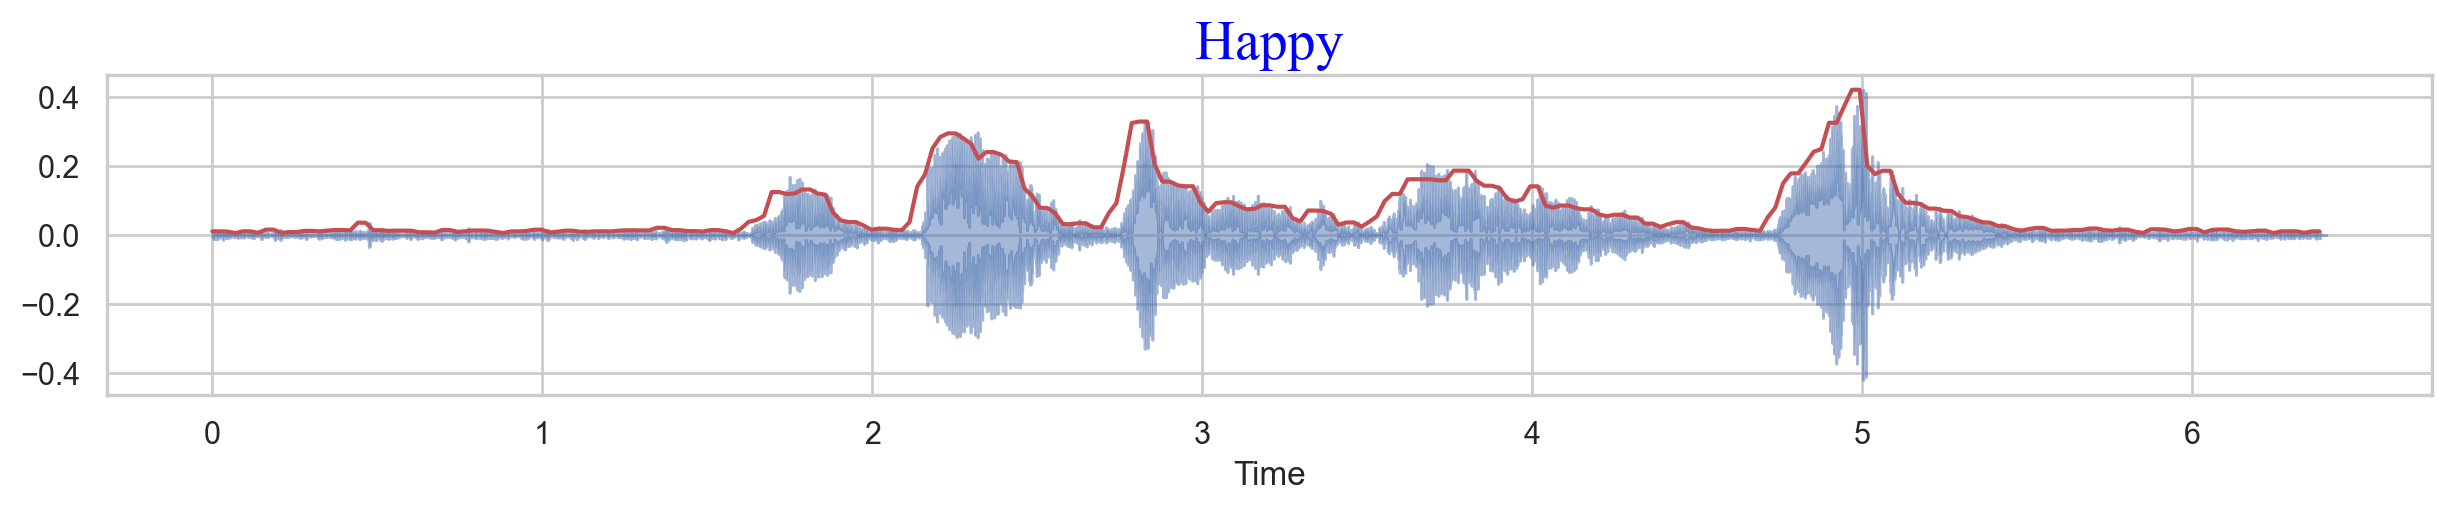

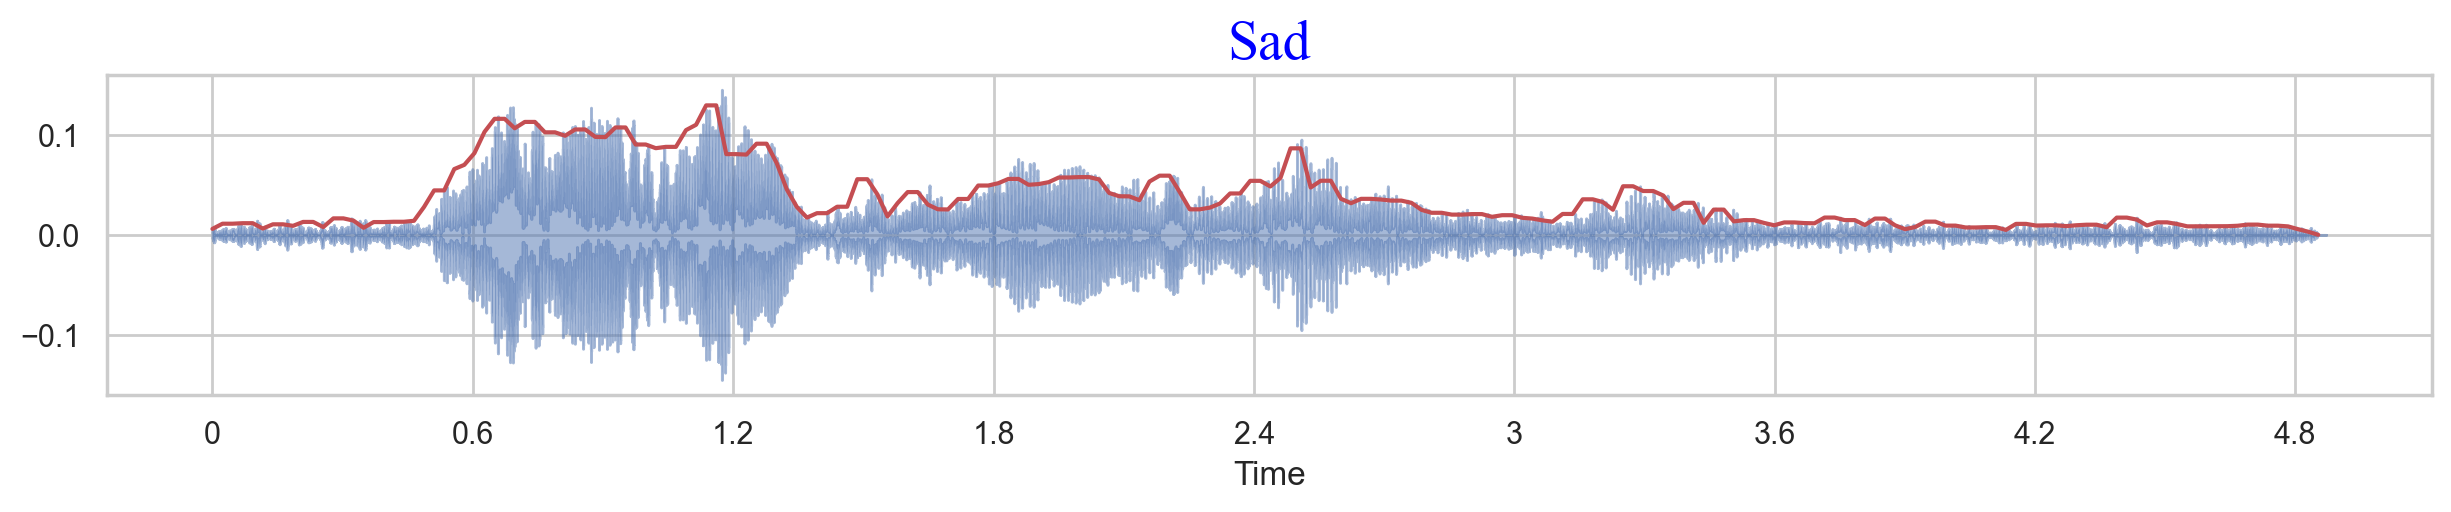

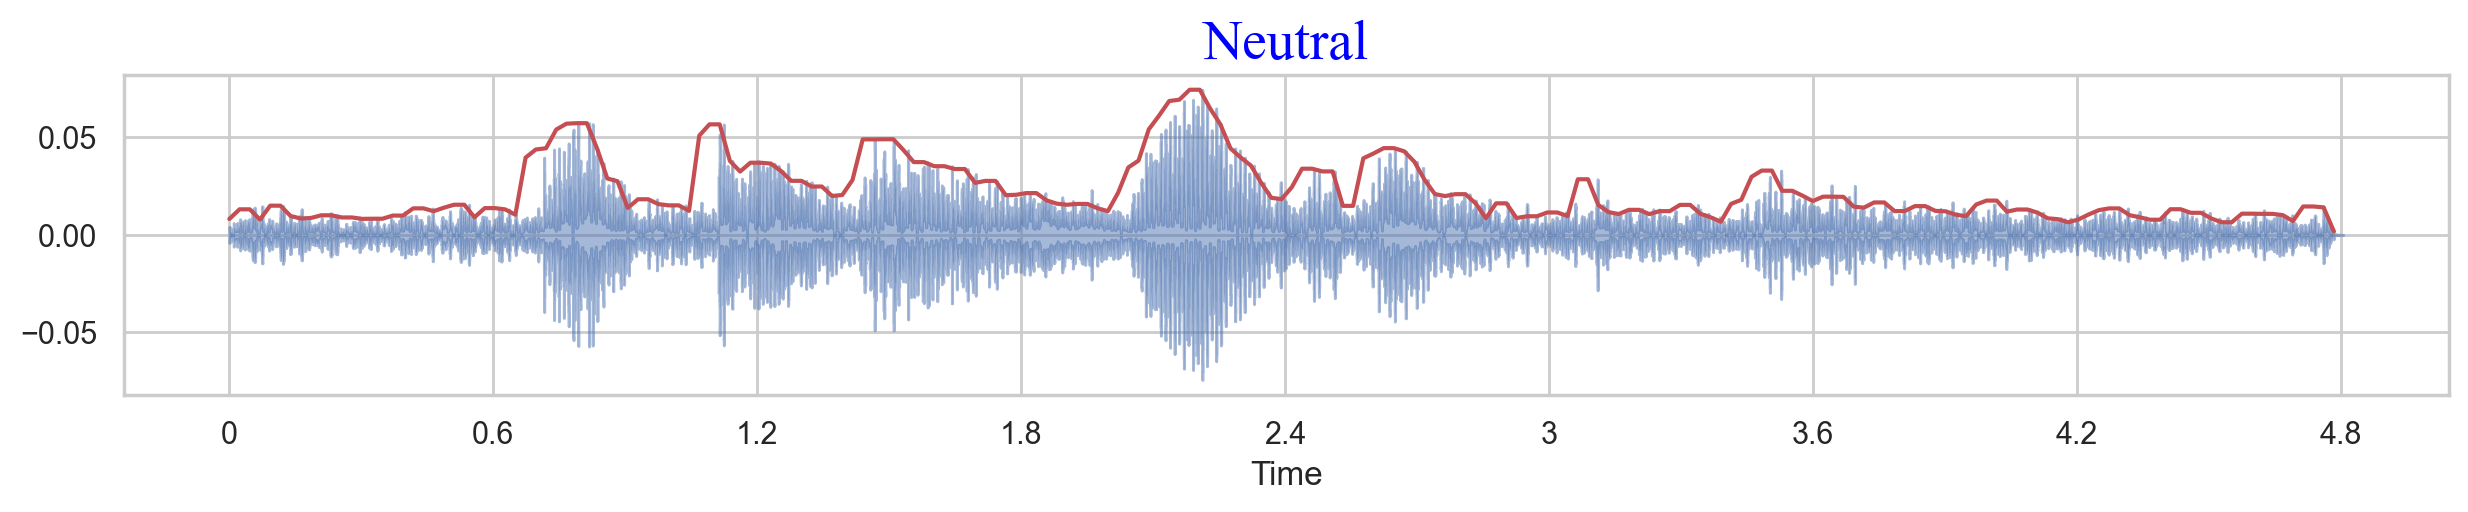

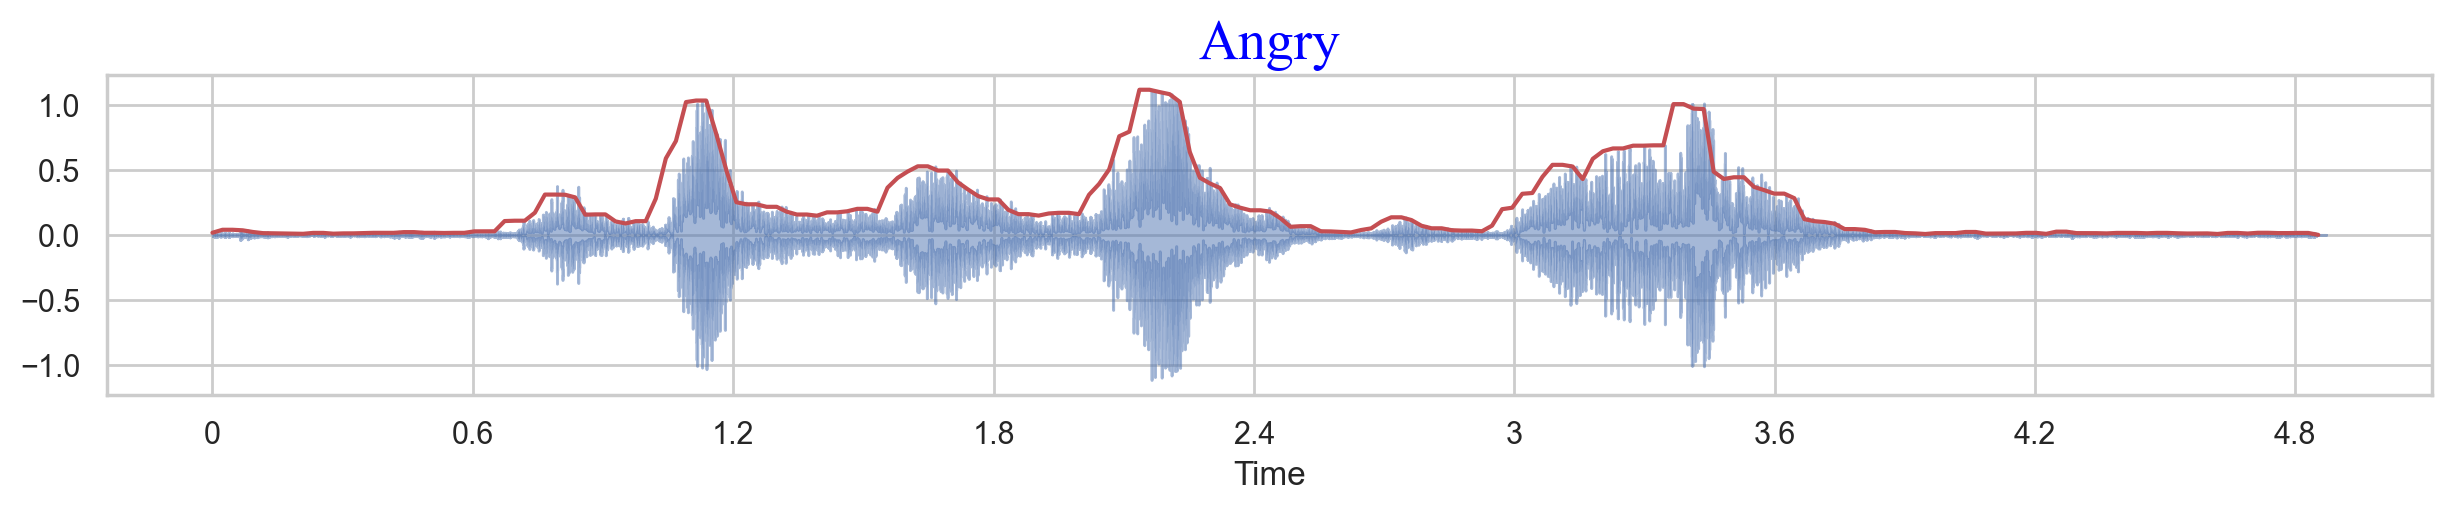

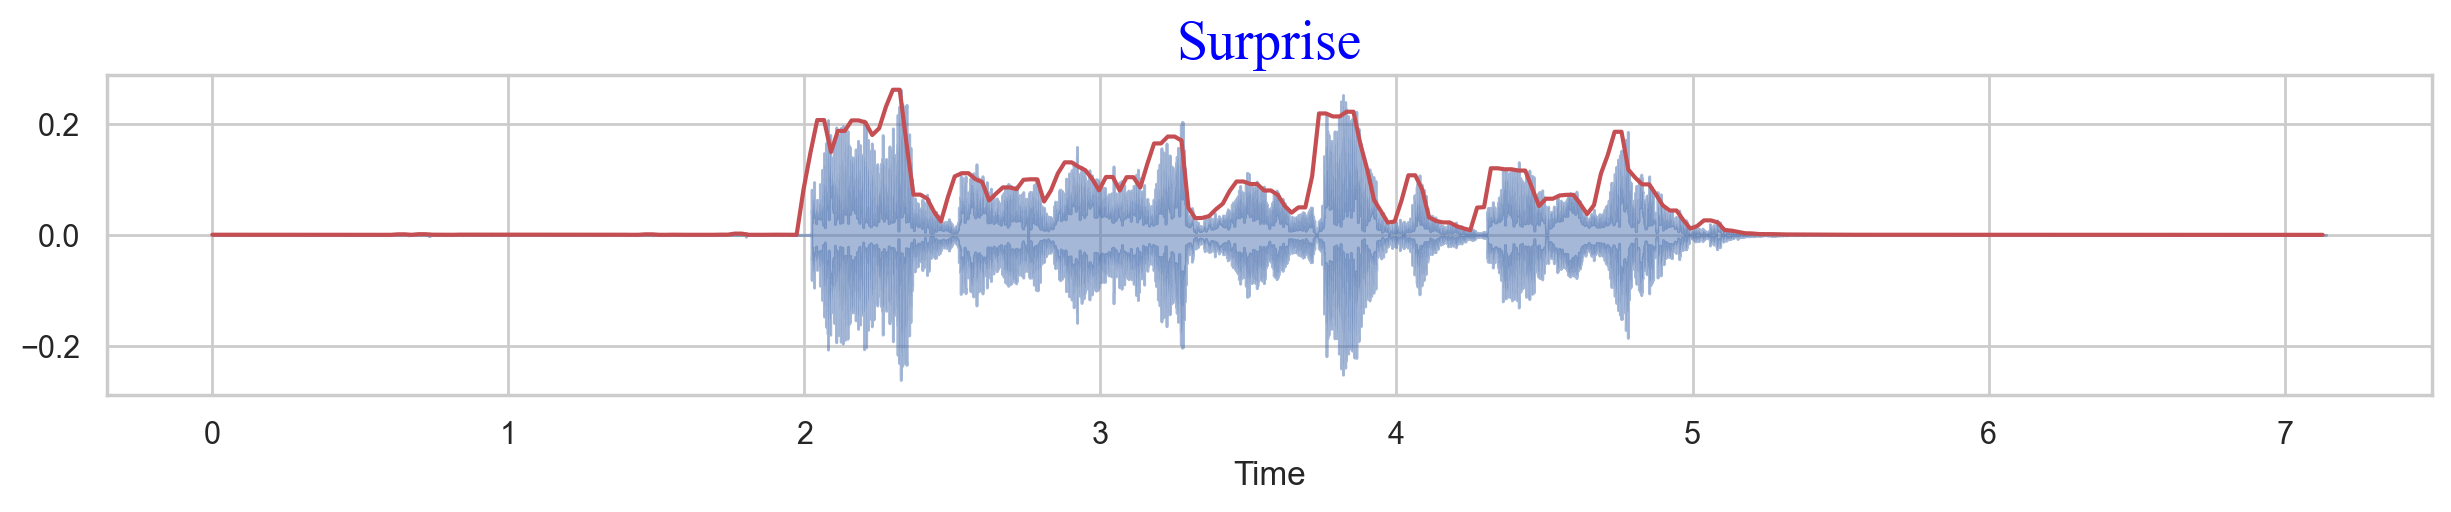

In [57]:
#Visualize amplitude envelope for all the audio files (Samples of each)

frames_fear = range(0, AE_fear.size)
frames_disgust = range(0, AE_disgust.size)
frames_happy = range(0, AE_happy.size)
frames_sad = range(0, AE_sad.size)
frames_neutral = range(0, AE_neutral.size)
frames_angry = range(0, AE_angry.size)
frames_surprise = range(0, AE_surprise.size)

t1 = librosa.frames_to_time(frames_fear, hop_length = Hop_lenght)
t2 = librosa.frames_to_time(frames_disgust, hop_length = Hop_lenght)
t3 = librosa.frames_to_time(frames_happy, hop_length = Hop_lenght)
t4 = librosa.frames_to_time(frames_sad, hop_length = Hop_lenght)
t5 = librosa.frames_to_time(frames_neutral, hop_length = Hop_lenght)
t6 = librosa.frames_to_time(frames_angry, hop_length = Hop_lenght)
t7 = librosa.frames_to_time(frames_surprise, hop_length = Hop_lenght)


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,1)
librosa.display.waveshow(Sp_fear, alpha = 0.5)
plt.plot(t1, AE_fear, color = "r")
plt.title("Fear", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,2)
librosa.display.waveshow(Sp_disgust, alpha = 0.5)
plt.plot(t2, AE_disgust, color = "r")
plt.title("Disgust", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,3)
librosa.display.waveshow(Sp_happy, alpha = 0.5)
plt.plot(t3, AE_happy, color = "r")
plt.title("Happy", fontdict= font2)
plt.show()

plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,4)
librosa.display.waveshow(Sp_sad, alpha = 0.5)
plt.plot(t4, AE_sad, color = "r")
plt.title("Sad", fontdict= font2)
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,5)
librosa.display.waveshow(Sp_neutral, alpha = 0.5)
plt.plot(t5, AE_neutral, color = "r")
plt.title("Neutral", fontdict= font2)
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,6)
librosa.display.waveshow(Sp_angry, alpha = 0.5)
plt.plot(t6, AE_angry, color = "r")
plt.title("Angry", fontdict= font2)
plt.show()


plt.figure(figsize=(15,17), dpi=200)
plt.subplot(7,1,7)
librosa.display.waveshow(Sp_surprise, alpha = 0.5)
plt.plot(t7, AE_surprise, color = "r")
plt.title("Surprise", fontdict= font2)
plt.show()

In [58]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data



def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=0.8)


# taking any example and checking for techniques.
path = np.array(Sum_df_rep.Path)[1]
data, sample_rate = librosa.load(path)

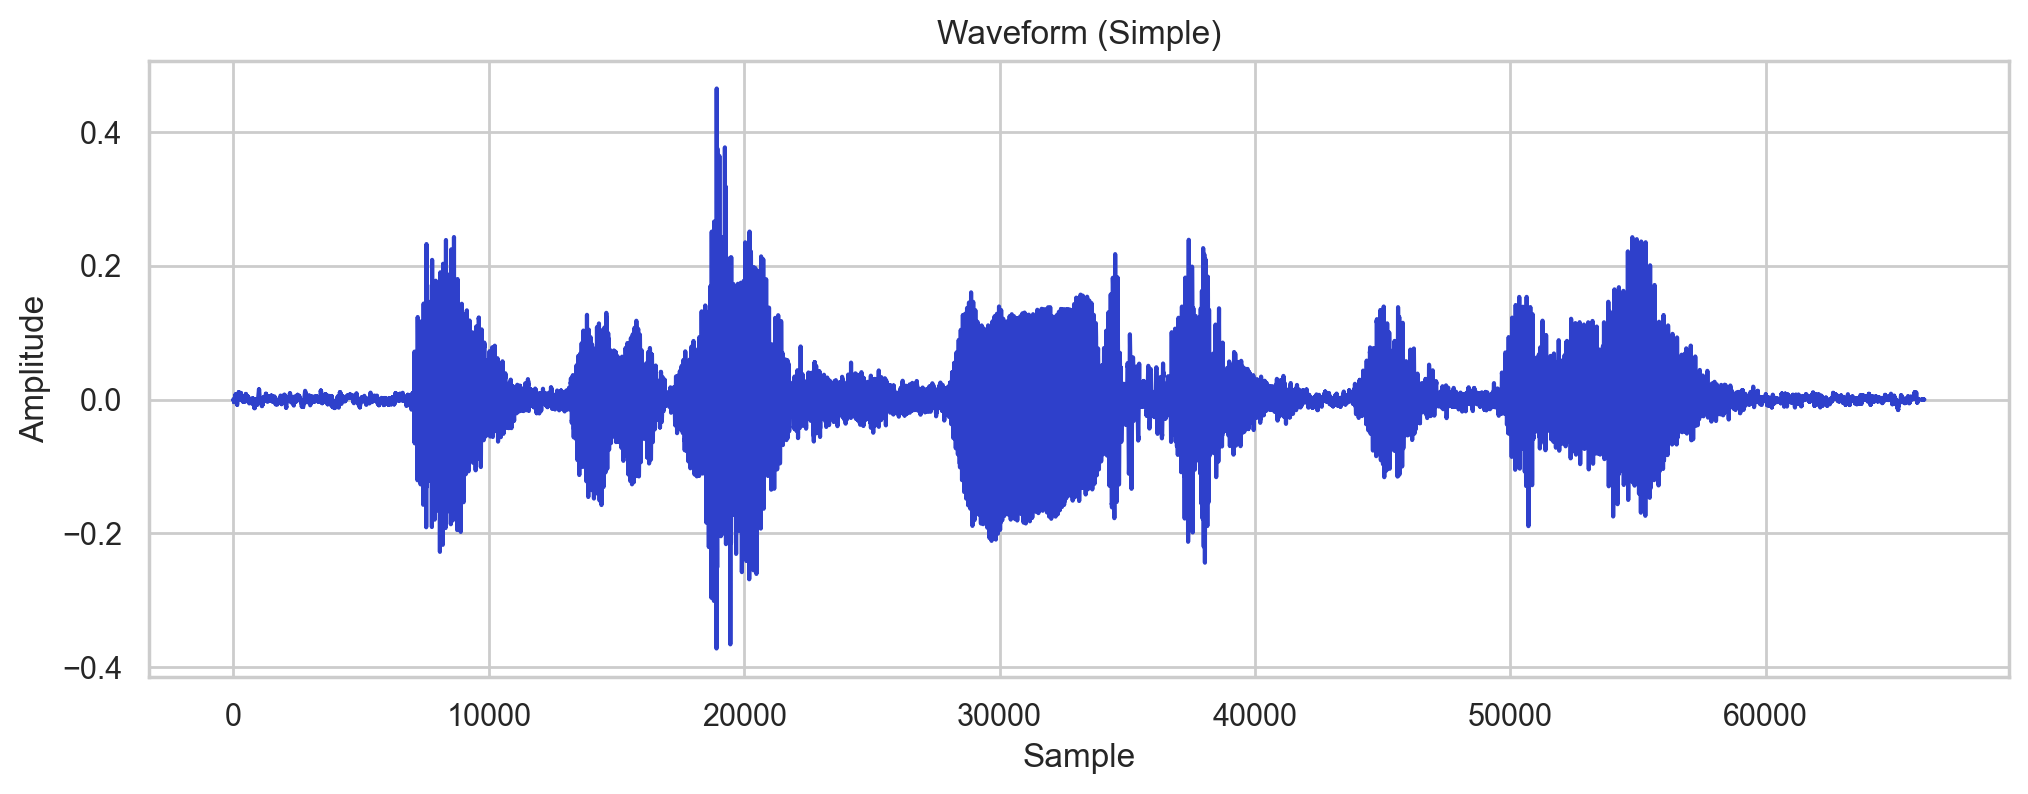

In [60]:
Simple_data = data
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Simple_data ,color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform (Simple)')
plt.show()

Audio(Simple_data, rate=sample_rate)

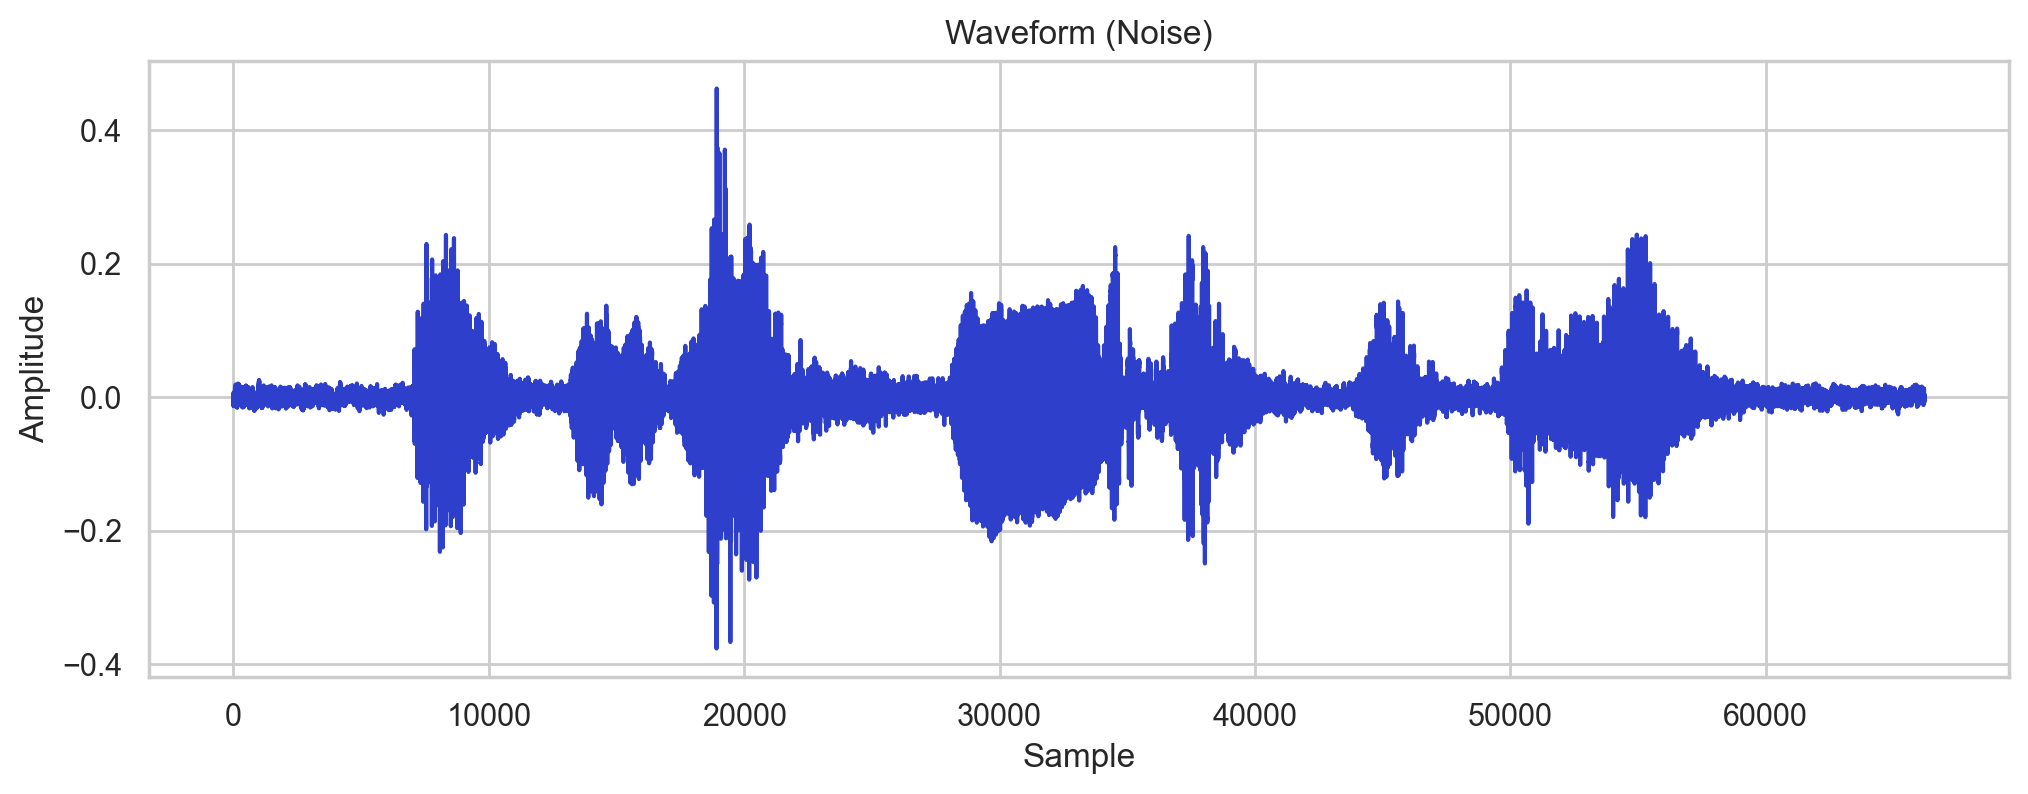

In [61]:
Noise_data = noise(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Noise_data ,color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform (Noise)')
plt.show()

Audio(Noise_data, rate=sample_rate)

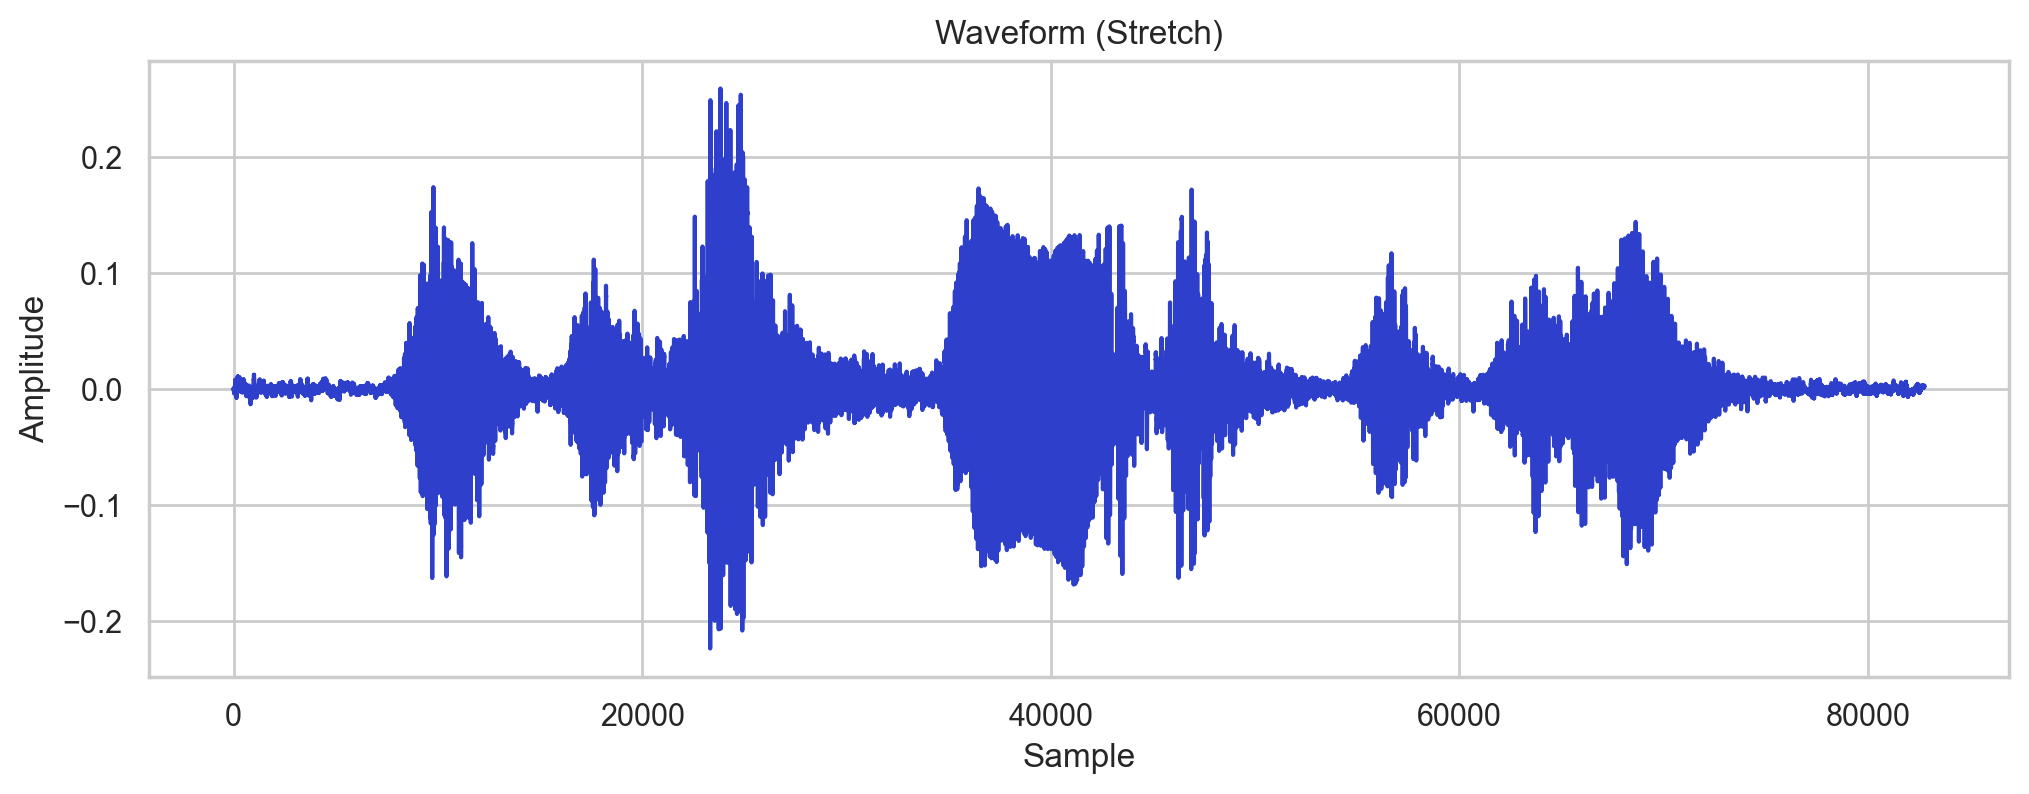

In [62]:
Stretch_data = stretch(data)
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(Stretch_data ,color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform (Stretch)')
plt.show()

Audio(Stretch_data, rate=sample_rate)

In [63]:
Crema_df

Emotions                                               Path
0       angry  data/kaggle/input/speech-emotion-recognition-e...
1       angry  data/kaggle/input/speech-emotion-recognition-e...
2     neutral  data/kaggle/input/speech-emotion-recognition-e...
3     neutral  data/kaggle/input/speech-emotion-recognition-e...
4     disgust  data/kaggle/input/speech-emotion-recognition-e...
...       ...                                                ...
7437    angry  data/kaggle/input/speech-emotion-recognition-e...
7438    angry  data/kaggle/input/speech-emotion-recognition-e...
7439    angry  data/kaggle/input/speech-emotion-recognition-e...
7440    angry  data/kaggle/input/speech-emotion-recognition-e...
7441  neutral  data/kaggle/input/speech-emotion-recognition-e...

[7442 rows x 2 columns]

* **[Table of Content](#0)**

In [64]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [65]:
extract_mfcc(Crema_df['Path'][0])

array([-2.5306090e+02,  1.0977661e+02, -3.0899892e+00,  4.8658745e+01,
       -9.5085611e+00, -1.2124888e+00, -1.9492447e+01,  2.6149992e-03,
       -1.5693570e+01, -1.9413183e+00, -8.3061562e+00, -3.6464510e+00,
        5.3349938e+00, -9.1106129e+00,  4.9668241e+00, -8.3655691e+00,
       -1.9263622e+00, -6.5914292e+00, -2.1274281e+00, -8.7410984e+00,
       -5.3866138e+00, -2.8523767e+00, -1.1824834e+01,  9.3823642e-01,
       -4.1533819e-01,  1.3292234e+00,  6.9874936e-01,  3.1621966e+00,
       -3.3734818e+00,  6.3364148e-01, -5.1586431e-01, -2.7933879e+00,
        3.5237288e+00,  3.8256082e-01,  3.2019200e+00,  1.2395660e+00,
        2.9361928e+00,  3.8238850e+00,  5.3017554e+00,  1.1654550e+00],
      dtype=float32)

In [66]:
%%time
X_mfcc = Crema_df['Path'].apply(lambda x: extract_mfcc(x))

CPU times: user 4min 12s, sys: 5.76 s, total: 4min 18s
Wall time: 27.8 s


In [67]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(7442, 40)

In [68]:
## input split
X = np.expand_dims(X, -1)
X.shape

(7442, 40, 1)

In [69]:
enc = OneHotEncoder()
y = enc.fit_transform(Crema_df[['Emotions']])

In [70]:
y = y.toarray()

In [71]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
print(Iterable)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,734 (1.17 MB)

 Trainable params: 305,734 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

<class 'collections.abc.Iterable'>


In [72]:
checkpoint_filepath = 'best_model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1)


def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler_callback = LearningRateScheduler(scheduler)

history = model.fit(X, y, validation_split=0.2, epochs=500, batch_size=64)

Epoch 1/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.2016 - loss: 1.7752 - val_accuracy: 0.2895 - val_loss: 1.6668
Epoch 2/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.2888 - loss: 1.6611 - val_accuracy: 0.3056 - val_loss: 1.6107
Epoch 3/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.3190 - loss: 1.5952 - val_accuracy: 0.3264 - val_loss: 1.5584
Epoch 4/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.3330 - loss: 1.5757 - val_accuracy: 0.3271 - val_loss: 1.5592
Epoch 5/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.3428 - loss: 1.5586 - val_accuracy: 0.3365 - val_loss: 1.5068
Epoch 6/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.3699 - loss: 1.5047 - val_accuracy: 0.3848 - val_loss: 1.4742
Epoch 7/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.3598 - loss: 1.4981 - val_accuracy: 0.3976 - val_loss: 1.4685
Epoch 8/500
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.3696 - loss: 1.5123 - val_accuracy: 0

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **2- Evaluation**

  - The accuracy and loss of model can be seen in the cells below.

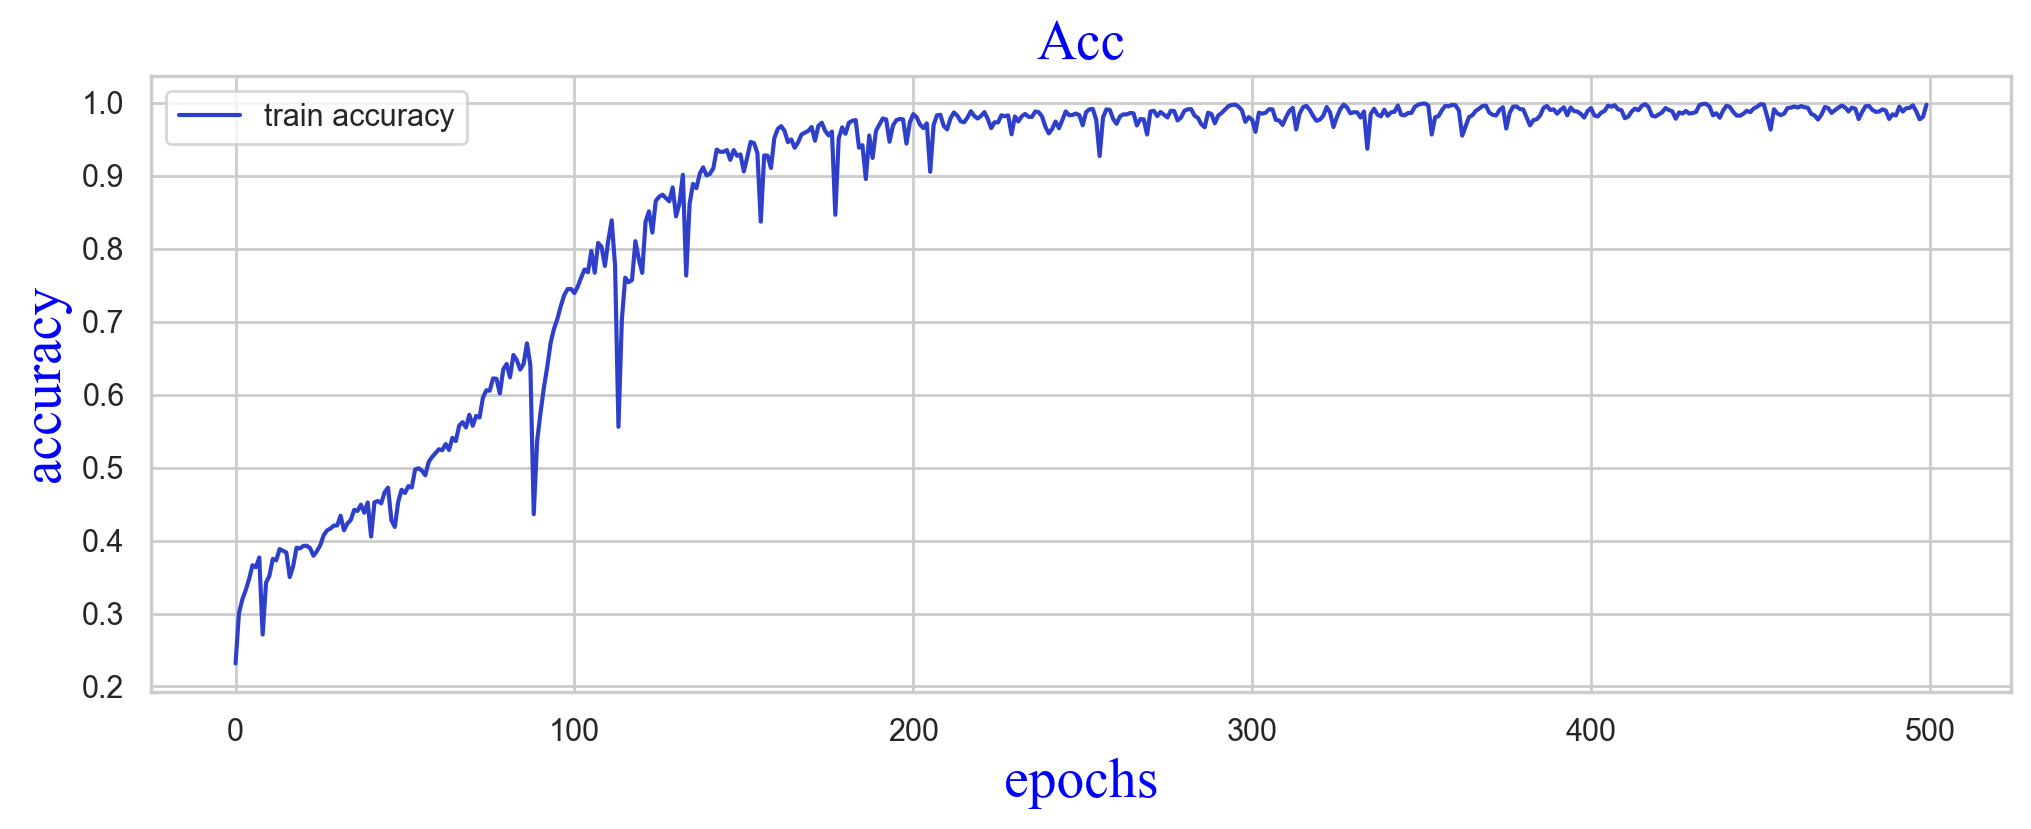

In [73]:
epochs = list(range(500))
acc = history.history['accuracy']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, acc, label='train accuracy', color='#2E40CB')
plt.xlabel('epochs', fontdict= font2)
plt.ylabel('accuracy', fontdict= font2)
plt.title('Acc', fontdict= font2)
plt.legend()
plt.show()

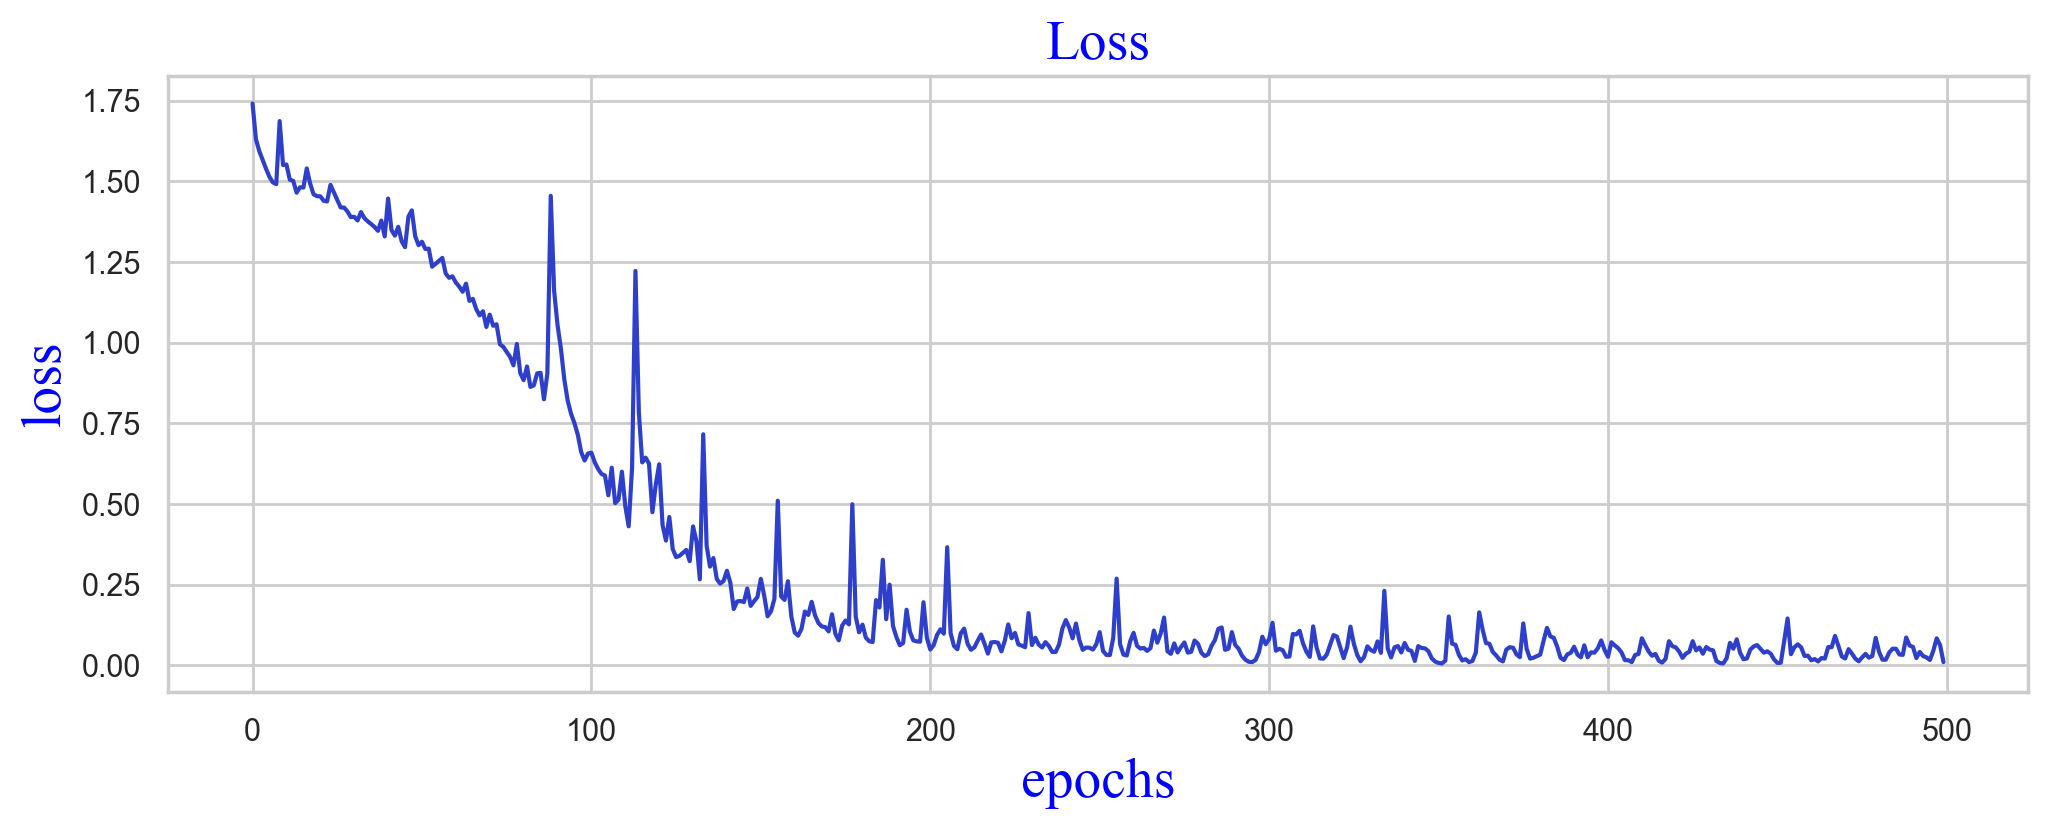

In [74]:
loss = history.history['loss']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, loss, label='train loss', color='#2E40CB')
plt.xlabel('epochs', fontdict= font2)
plt.ylabel('loss', fontdict= font2)
plt.title('Loss', fontdict= font2)
plt.show()

In [77]:
model.save('./models/model_lstm.h5')